# Accuracy
In this example we will explore how accuracy effects the effectiveness of the methodolgy as accuracy decreases

In [1]:
import math
import warnings

from typing import List, Dict
from statistics import mean, stdev
from random import randint, random

import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from scipy.stats import norm

warnings.filterwarnings("ignore")

matplotlib.rcParams["animation.embed_limit"] = 2**128
matplotlib.rcParams["figure.dpi"] = 300

## Generating data

The data used for this notebook follows the equation $y = mx + c$. To ensure replicable results as well as keeping the network's topology as simple as possible, the values for **m's** and **c's** are static whilst the values for **x's** are randomly generated. There is the addition of a **noise** column that is purely there as a target for the network to tune out. 

In order to tweak the accuracy, we will generate three sets of data which will progressively reduce the accuracy of the model. This will be achieved by swapping out various values for **y's** with randomly selected values.

In [2]:
samples = 5000
split = 100


def generate_random_values():
    return [randint(0, 50) * randint(0, 50) for _ in range(samples)]


ms = [2 for _ in range(samples)]
xs = generate_random_values()
cs = [50 for _ in range(samples)]

ys = []
for i in range(samples):
    y = ms[i] * xs[i] + cs[i]
    ys.append(y)
noise = [randint(0, 100) for _ in range(samples)]

### Dataset 1 - ~85% Accuracy

In [3]:
random_indices = [randint(0, samples - 1) for _ in range(int(samples / 25))]
for i in random_indices:
        ys[i] = randint(min(ys), max(ys))


data = {"ms": ms, "xs": xs, "cs": cs, "noise": noise, "ys": ys}

df = pd.DataFrame(data=data)
train = df.iloc[split:]
test = df.iloc[:split]

In [4]:
X_train_1 = train[["ms", "xs", "cs", "noise"]]
y_train_1 = train["ys"]
X_test_1 = test[["ms", "xs", "cs", "noise"]]
y_test_1 = test["ys"]

### Dataset 2 - ~70% Accuracy

In [5]:
random_indices = [randint(0, samples - 1) for _ in range(int(samples / 10))]
for i in random_indices:
        ys[i] = randint(min(ys), max(ys))

data = {"ms": ms, "xs": xs, "cs": cs, "noise": noise, "ys": ys}

df = pd.DataFrame(data=data)
train = df.iloc[split:]
test = df.iloc[:split]

In [6]:
X_train_2 = train[["ms", "xs", "cs", "noise"]]
y_train_2 = train["ys"]
X_test_2 = test[["ms", "xs", "cs", "noise"]]
y_test_2 = test["ys"]

### Dataset 3 - ~65% Accuracy

In [7]:
random_indices = [randint(0, samples - 1) for _ in range(int(samples / 5))]
for i in random_indices:
        ys[i] = randint(min(ys), max(ys))

data = {"ms": ms, "xs": xs, "cs": cs, "noise": noise, "ys": ys}

df = pd.DataFrame(data=data)
train = df.iloc[split:]
test = df.iloc[:split]

In [8]:
X_train_3 = train[["ms", "xs", "cs", "noise"]]
y_train_3 = train["ys"]
X_test_3 = test[["ms", "xs", "cs", "noise"]]
y_test_3 = test["ys"]

In [9]:
def create_history(columns: int, nodes: int) -> Dict:
    return {i:{j: [] for j in range(nodes)} for i in range(columns)}

## Models

In [10]:
FIRST_LAYER = 4

### Dataset 1

In [11]:
history_1 = create_history(len(X_train_1.columns), FIRST_LAYER)

In [12]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(units=FIRST_LAYER, input_shape=[4]))
model_1.add(tf.keras.layers.Dense(units=1))
model_1.summary()
opt = Adam(0.01)
model_1.compile(optimizer=opt, loss="mean_squared_error")

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


2022-12-06 18:23:24.991511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 18:23:24.991664: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
for epoch in range(1, 301):
    print(f"RUNNING EPOCH {epoch}")
    hist = model_1.fit(X_train_1, y_train_1, epochs=1)
    all_weights = model_1.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history_1[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1


2022-12-06 18:23:25.127993: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 18:23:25.303694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


154/154 [==============================] - 1s 5ms/step - loss: 208018.6719
RUNNING EPOCH 2
154/154 [==============================] - 1s 5ms/step - loss: 177032.1094
RUNNING EPOCH 3
154/154 [==============================] - 1s 5ms/step - loss: 176937.8906
RUNNING EPOCH 4
154/154 [==============================] - 1s 5ms/step - loss: 178290.4531
RUNNING EPOCH 5
154/154 [==============================] - 1s 4ms/step - loss: 177221.9062
RUNNING EPOCH 6
154/154 [==============================] - 1s 4ms/step - loss: 177322.5312
RUNNING EPOCH 7
154/154 [==============================] - 1s 4ms/step - loss: 177444.0781
RUNNING EPOCH 8
154/154 [==============================] - 1s 4ms/step - loss: 177768.9531
RUNNING EPOCH 9
154/154 [==============================] - 1s 4ms/step - loss: 177196.2969
RUNNING EPOCH 10
154/154 [==============================] - 1s 4ms/step - loss: 177365.9844
RUNNING EPOCH 11
154/154 [==============================] - 1s 4ms/step - loss: 176920.3438
RUNNING EPOCH

### Dataset 2

In [14]:
history_2 = create_history(len(X_train_2.columns), FIRST_LAYER)

In [15]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(units=FIRST_LAYER, input_shape=[4]))
model_2.add(tf.keras.layers.Dense(units=1))
model_2.summary()
opt = Adam(0.01)
model_2.compile(optimizer=opt, loss="mean_squared_error")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [16]:
for epoch in range(1, 301):
    print(f"RUNNING EPOCH {epoch}")
    hist = model_2.fit(X_train_2, y_train_2, epochs=1)
    all_weights = model_2.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history_2[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1
 25/154 [===>..........................] - ETA: 0s - loss: 6951461.5000

2022-12-06 18:26:56.786493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


154/154 [==============================] - 1s 4ms/step - loss: 2849126.5000
RUNNING EPOCH 2
154/154 [==============================] - 1s 4ms/step - loss: 590387.0625
RUNNING EPOCH 3
154/154 [==============================] - 1s 4ms/step - loss: 588794.1875
RUNNING EPOCH 4
154/154 [==============================] - 1s 4ms/step - loss: 587787.1250
RUNNING EPOCH 5
154/154 [==============================] - 1s 4ms/step - loss: 587393.4375
RUNNING EPOCH 6
154/154 [==============================] - 1s 4ms/step - loss: 586458.7500
RUNNING EPOCH 7
154/154 [==============================] - 1s 4ms/step - loss: 585094.1875
RUNNING EPOCH 8
154/154 [==============================] - 1s 4ms/step - loss: 585232.2500
RUNNING EPOCH 9
154/154 [==============================] - 1s 4ms/step - loss: 584228.6875
RUNNING EPOCH 10
154/154 [==============================] - 1s 4ms/step - loss: 582482.3125
RUNNING EPOCH 11
154/154 [==============================] - 1s 4ms/step - loss: 583042.9375
RUNNING EPOC

### Dataset 3

In [17]:
history_3 = create_history(len(X_train_3.columns), FIRST_LAYER)

In [18]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(units=FIRST_LAYER, input_shape=[4]))
model_3.add(tf.keras.layers.Dense(units=1))
model_3.summary()
opt = Adam(0.01)
model_3.compile(optimizer=opt, loss="mean_squared_error")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [19]:
for epoch in range(1, 301):
    print(f"RUNNING EPOCH {epoch}")
    hist = model_3.fit(X_train_3, y_train_3, epochs=1)
    all_weights = model_3.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history_3[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1
 24/154 [===>..........................] - ETA: 0s - loss: 8037685.5000 

2022-12-06 18:30:21.511504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


154/154 [==============================] - 1s 4ms/step - loss: 3754670.2500
RUNNING EPOCH 2
154/154 [==============================] - 1s 4ms/step - loss: 1306533.8750
RUNNING EPOCH 3
154/154 [==============================] - 1s 4ms/step - loss: 1275812.1250
RUNNING EPOCH 4
154/154 [==============================] - 1s 4ms/step - loss: 1258810.7500
RUNNING EPOCH 5
154/154 [==============================] - 1s 4ms/step - loss: 1248168.8750
RUNNING EPOCH 6
154/154 [==============================] - 1s 4ms/step - loss: 1244847.5000
RUNNING EPOCH 7
154/154 [==============================] - 1s 4ms/step - loss: 1240833.7500
RUNNING EPOCH 8
154/154 [==============================] - 1s 4ms/step - loss: 1235456.6250
RUNNING EPOCH 9
154/154 [==============================] - 1s 4ms/step - loss: 1232299.7500
RUNNING EPOCH 10
154/154 [==============================] - 1s 4ms/step - loss: 1231177.5000
RUNNING EPOCH 11
154/154 [==============================] - 1s 4ms/step - loss: 1228019.3750
RU

## Evaluating Models

### Dataset 1

In [20]:
res_ms = X_test_1["ms"].values.tolist()
res_xs = X_test_1["xs"].values.tolist()
res_cs = X_test_1["cs"].values.tolist()
res_noise = X_test_1["noise"].values.tolist()
res_pred = [
    round(i) for i in model_1.predict(X_test_1).flatten().tolist()
]
res = {
    "ms": res_ms,
    "xs": res_xs,
    "cs": res_cs,
    "noise": res_noise,
    "ys": y_test_1,
    "pred": res_pred
}

res = pd.DataFrame(res)
res

4/4 [==============================] - 0s 3ms/step


2022-12-06 18:33:46.013024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,ms,xs,cs,noise,ys,pred
0,2,0,50,9,50,131
1,2,1008,50,38,2066,2089
2,2,330,50,12,710,771
3,2,1363,50,8,2776,2769
4,2,1496,50,5,3042,3025
...,...,...,...,...,...,...
95,2,470,50,50,990,1051
96,2,24,50,68,98,193
97,2,147,50,70,344,431
98,2,595,50,16,1240,1284


In [21]:
expected = list(res["ys"].values)
actual = list(res["pred"].values)
accuracies = []
for i in range(len(expected)):
    if expected[i] > actual[i]:
        accuracies.append((actual[i] / expected[i]) * 100)
    elif expected[i] < actual[i]:
        accuracies.append((expected[i] / actual[i]) * 100)
    else:
        accuracies.append(100)
print(f"Model 1 is correct to {round(mean(accuracies), 5)}%")

Model 1 is correct to 82.91462%


### Dataset 2

In [22]:
res_ms = X_test_2["ms"].values.tolist()
res_xs = X_test_2["xs"].values.tolist()
res_cs = X_test_2["cs"].values.tolist()
res_noise = X_test_2["noise"].values.tolist()
res_pred = [
    round(i) for i in model_2.predict(X_test_2).flatten().tolist()
]
res = {
    "ms": res_ms,
    "xs": res_xs,
    "cs": res_cs,
    "noise": res_noise,
    "ys": y_test_2,
    "pred": res_pred
}

res = pd.DataFrame(res)
res

4/4 [==============================] - 0s 3ms/step


2022-12-06 18:33:46.173116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,ms,xs,cs,noise,ys,pred
0,2,0,50,9,50,356
1,2,1008,50,38,3651,2029
2,2,330,50,12,710,905
3,2,1363,50,8,2776,2626
4,2,1496,50,5,3042,2848
...,...,...,...,...,...,...
95,2,470,50,50,990,1131
96,2,24,50,68,98,385
97,2,147,50,70,344,590
98,2,595,50,16,1363,1345


In [23]:
expected = list(res["ys"].values)
actual = list(res["pred"].values)
accuracies = []
for i in range(len(expected)):
    if expected[i] > actual[i]:
        accuracies.append((actual[i] / expected[i]) * 100)
    elif expected[i] < actual[i]:
        accuracies.append((expected[i] / actual[i]) * 100)
    else:
        accuracies.append(100)
print(f"Model 2 is correct to {round(mean(accuracies), 5)}%")

Model 2 is correct to 68.06047%


### Dataset 3

In [24]:
res_ms = X_test_3["ms"].values.tolist()
res_xs = X_test_3["xs"].values.tolist()
res_cs = X_test_3["cs"].values.tolist()
res_noise = X_test_3["noise"].values.tolist()
res_pred = [
    round(i) for i in model_3.predict(X_test_3).flatten().tolist()
]
res = {
    "ms": res_ms,
    "xs": res_xs,
    "cs": res_cs,
    "noise": res_noise,
    "ys": y_test_3,
    "pred": res_pred
}

res = pd.DataFrame(res)
res

4/4 [==============================] - 0s 3ms/step


2022-12-06 18:33:46.331549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,ms,xs,cs,noise,ys,pred
0,2,0,50,9,50,774
1,2,1008,50,38,703,2193
2,2,330,50,12,710,1235
3,2,1363,50,8,2776,2675
4,2,1496,50,5,3042,2860
...,...,...,...,...,...,...
95,2,470,50,50,1281,1447
96,2,24,50,68,98,833
97,2,147,50,70,344,1005
98,2,595,50,16,1363,1607


In [25]:
expected = list(res["ys"].values)
actual = list(res["pred"].values)
accuracies = []
for i in range(len(expected)):
    if expected[i] > actual[i]:
        accuracies.append((actual[i] / expected[i]) * 100)
    elif expected[i] < actual[i]:
        accuracies.append((expected[i] / actual[i]) * 100)
    else:
        accuracies.append(100)
print(f"Model 3 is correct to {round(mean(accuracies), 5)}%")

Model 3 is correct to 51.86292%


## Colors
Here we use the same colors throughout to represent the values:
- <span style="color: #F3D250;">Important Value (x)</span>
- <span style="color: #90CCF4;">Static Value (m)</span>
- <span style="color: #5DA2D5;">Static Value (c)</span>
- <span style="color: #F78888;">Noise Value (noise)</span>

In [26]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

## Grouping Results

In [27]:
def get_group_by_node(history: Dict, index: int) -> List:
    group = []
    for i in list(history.keys()):
        group.append(history[i][index])
    return group

In [28]:
groups_1 = [get_group_by_node(history_1, i) for i in range(len(history_1.keys()))]
groups_2 = [get_group_by_node(history_2, i) for i in range(len(history_2.keys()))]
groups_3 = [get_group_by_node(history_3, i) for i in range(len(history_3.keys()))]

## Probability Densities

In [29]:
def plot_pds(group):
    _, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    colors = [darker, important, light, noise]

    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

### Dataset 1

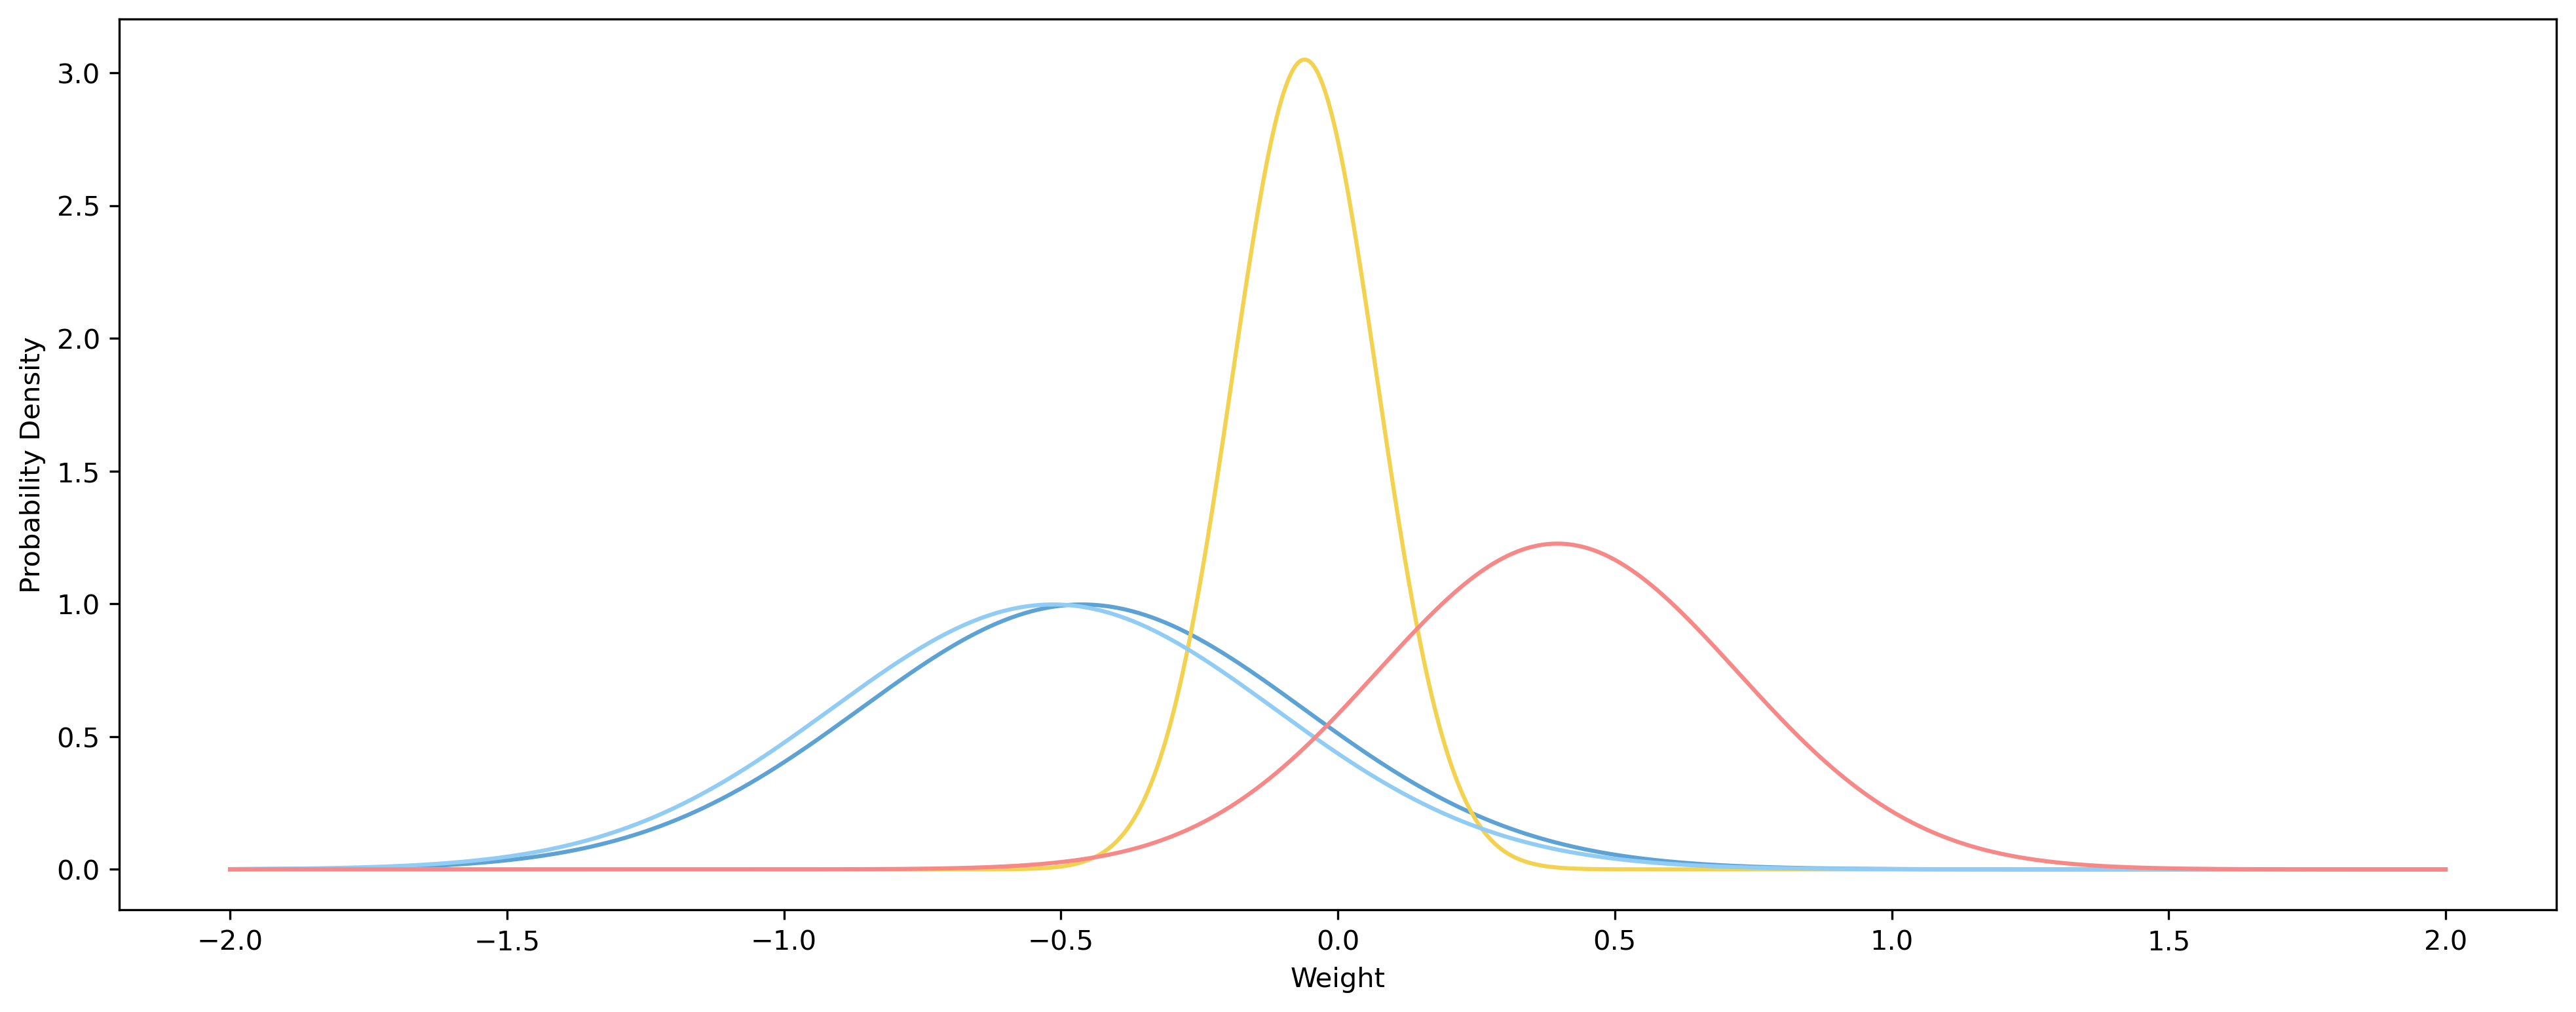

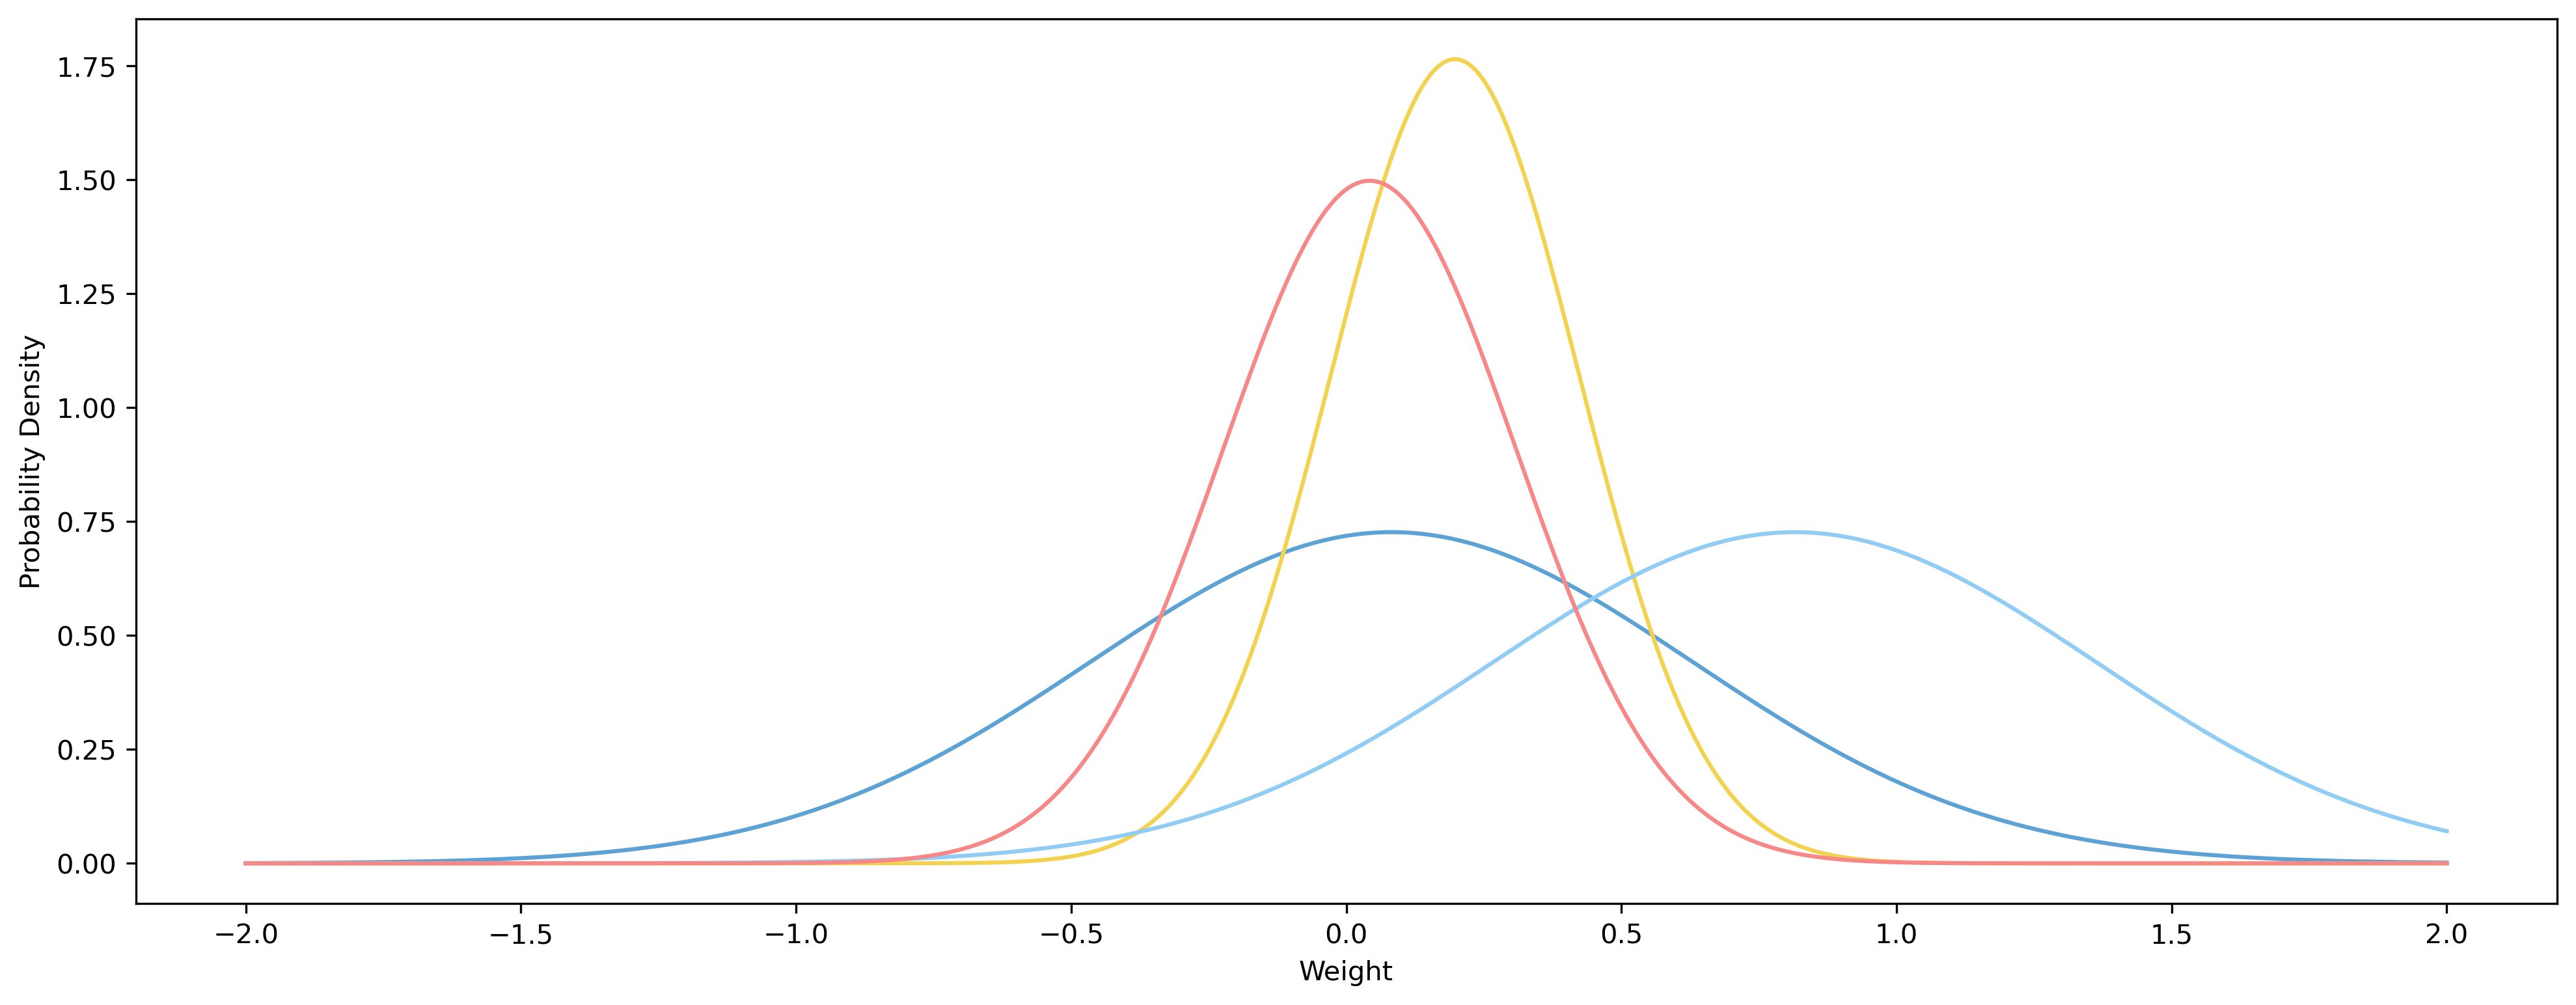

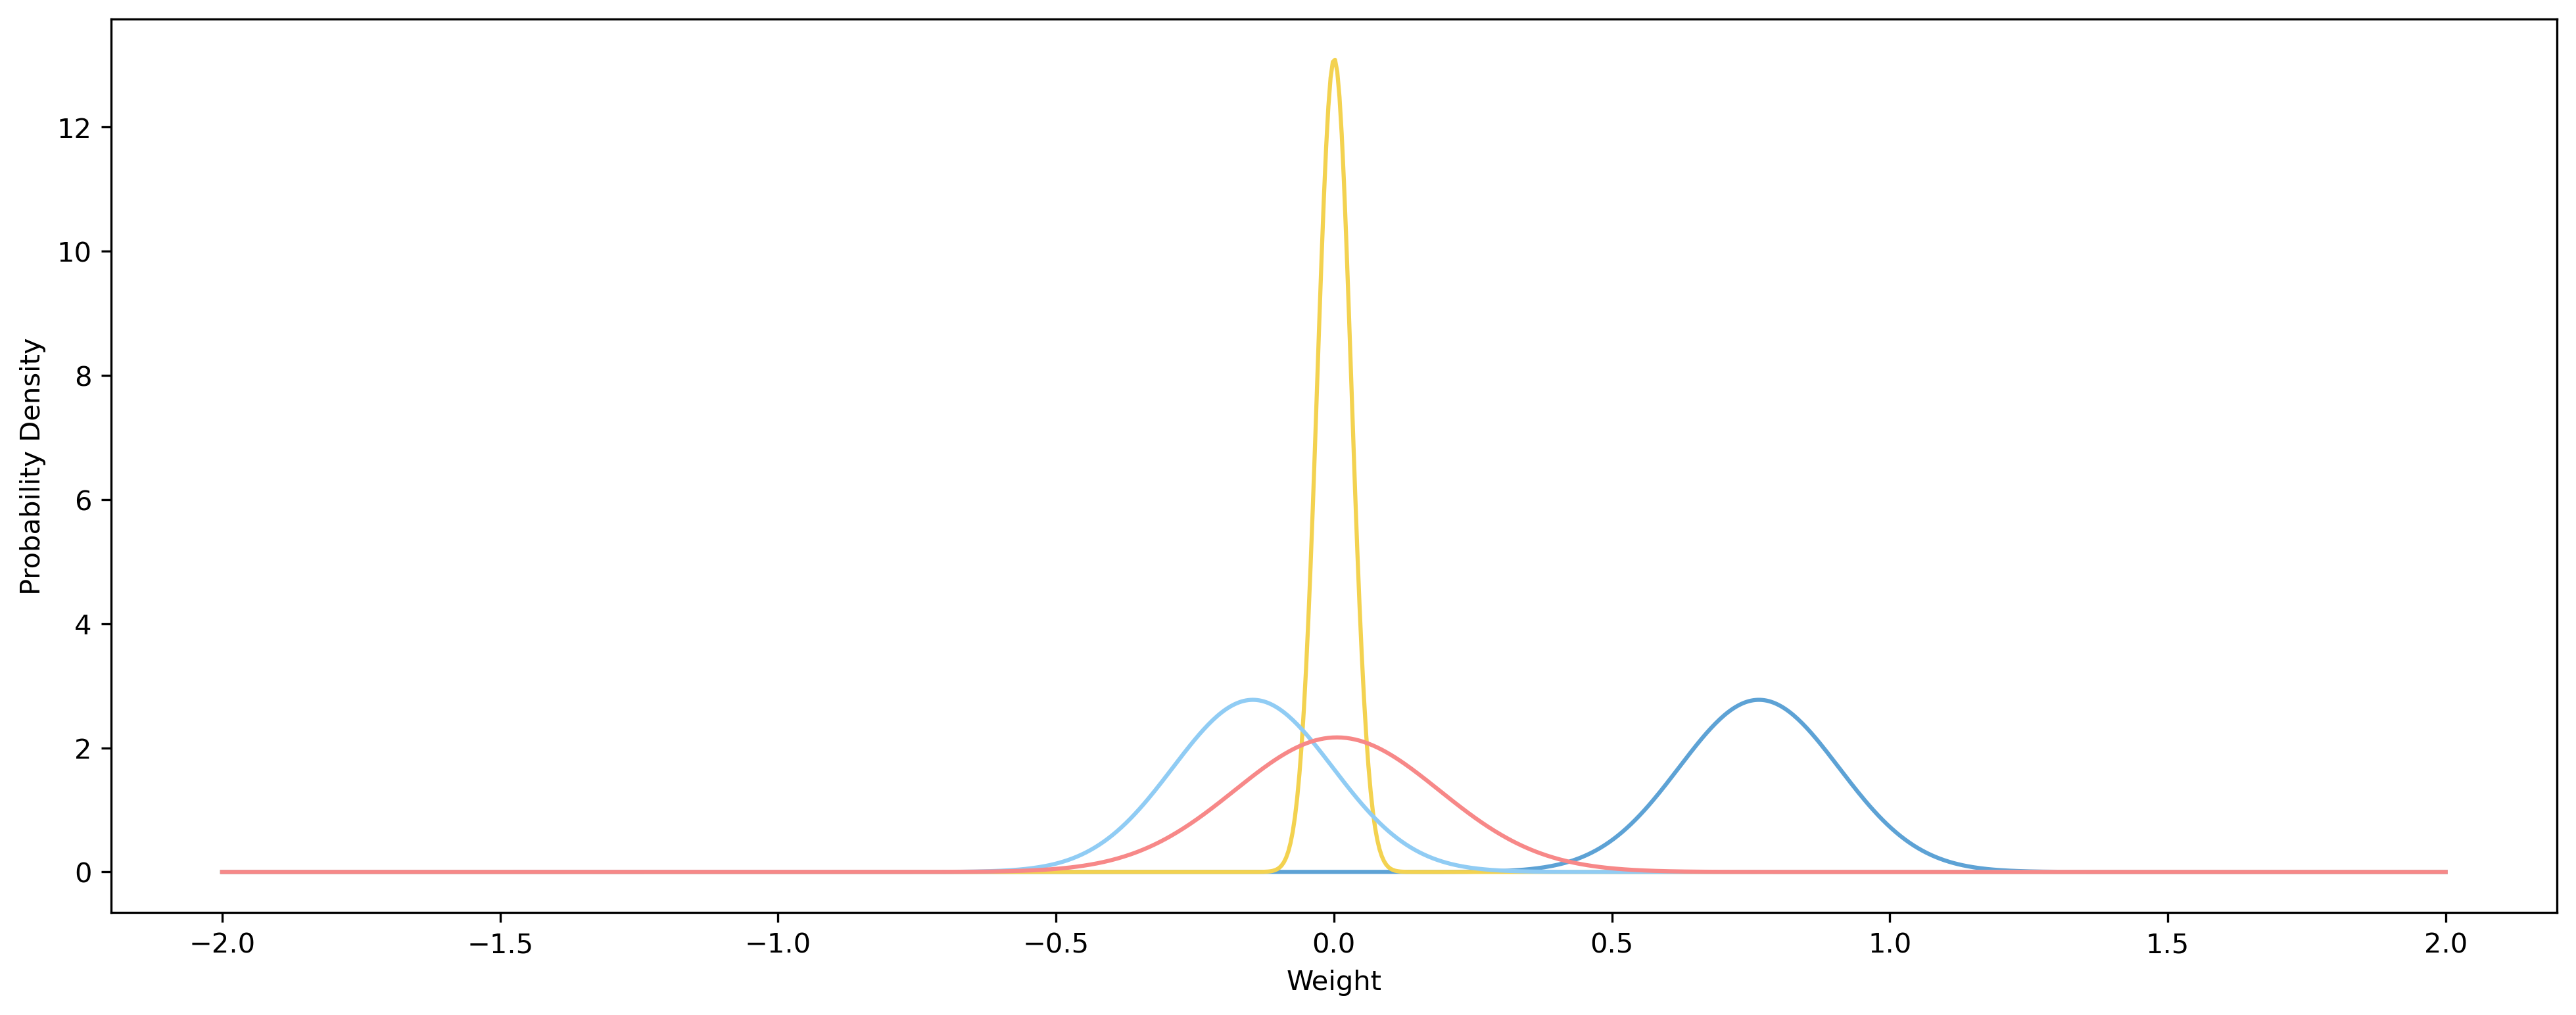

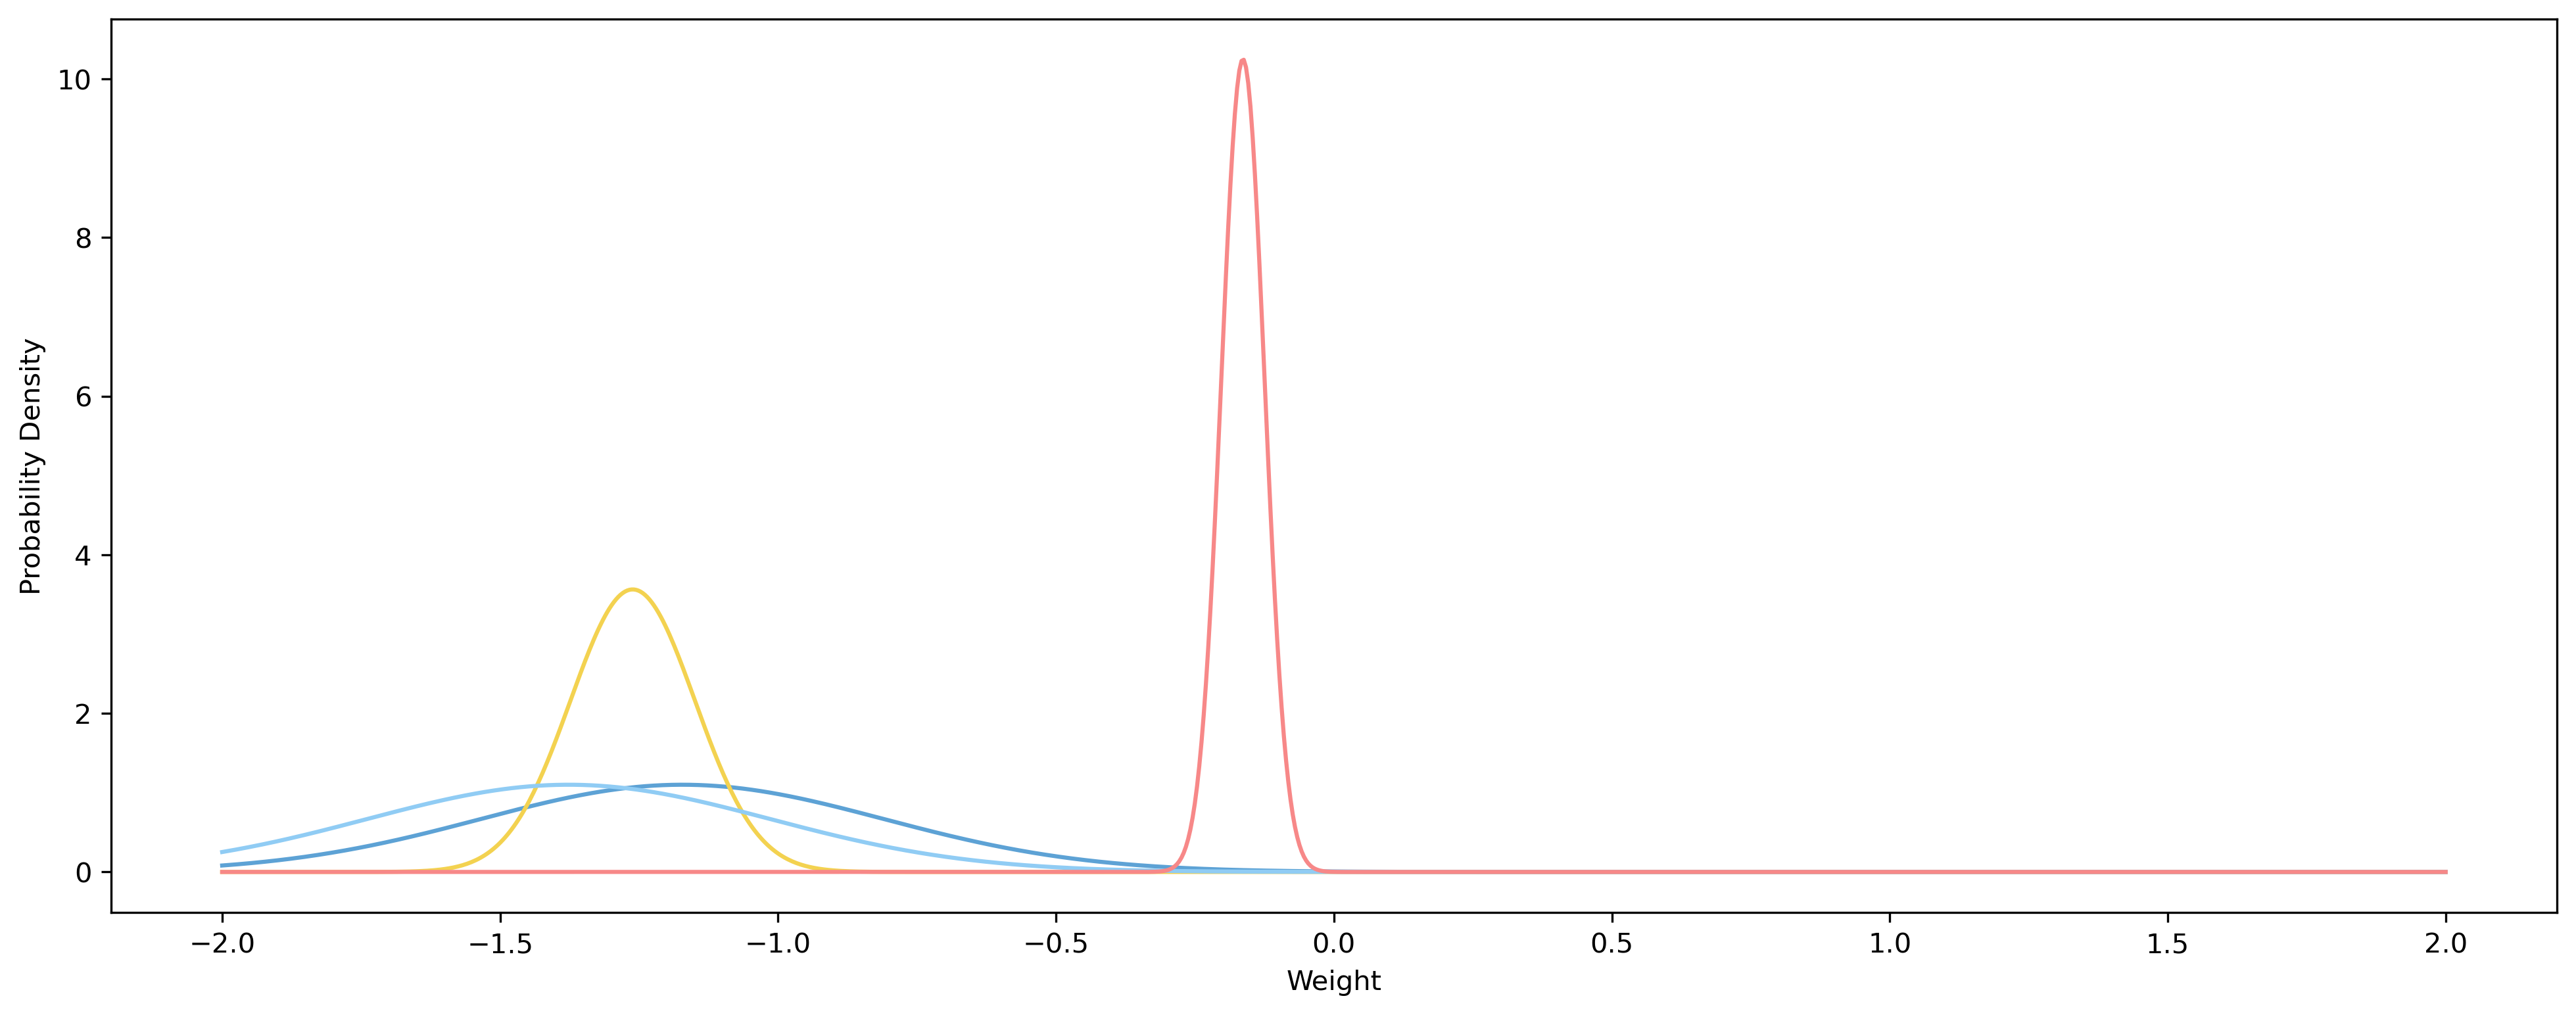

In [30]:
for group in groups_1:
    plot_pds(group)

### Datatset 2

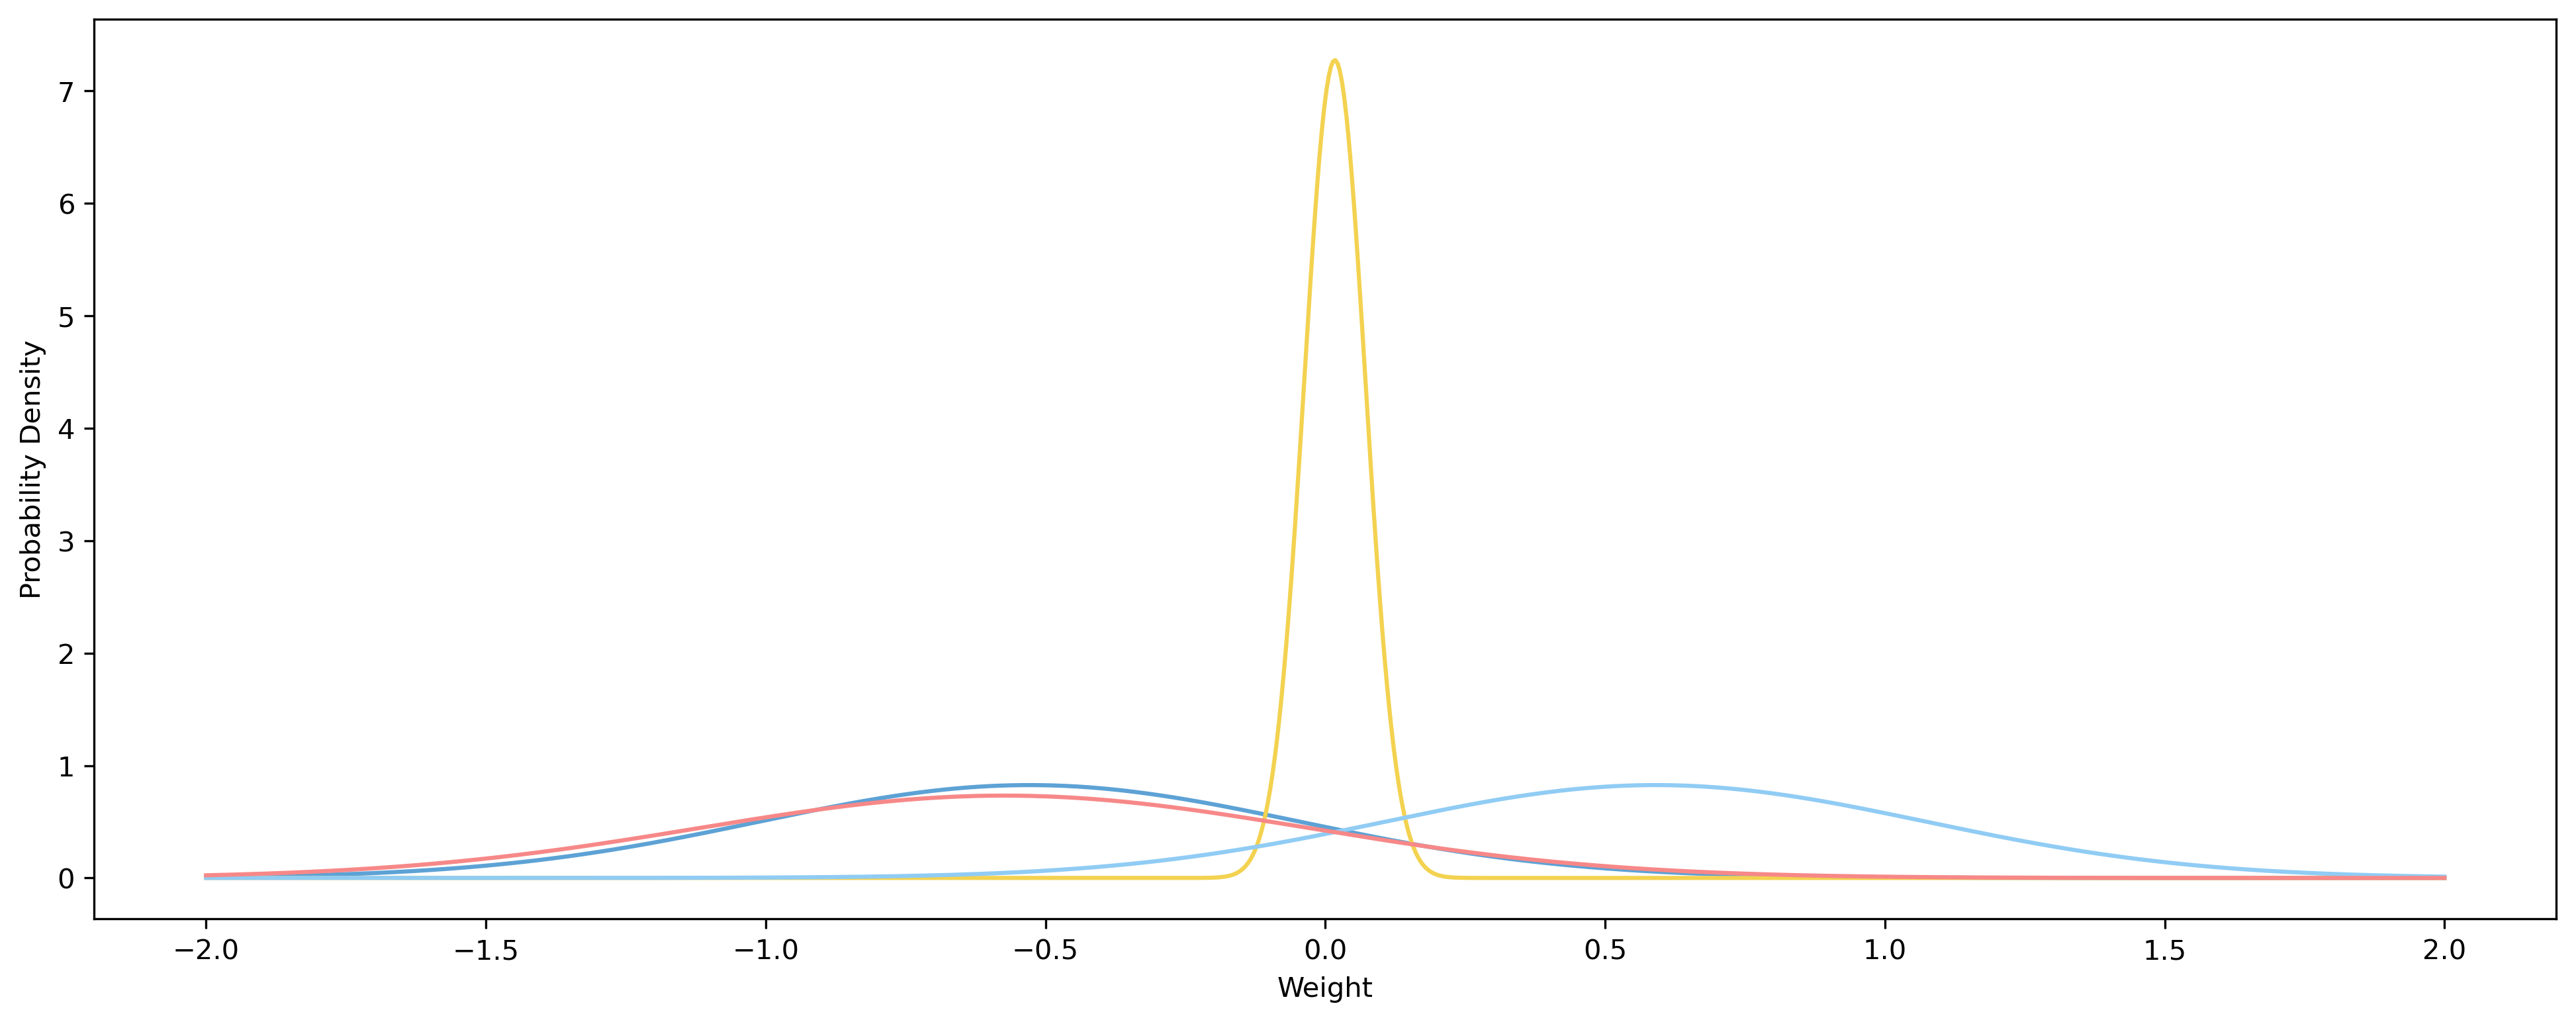

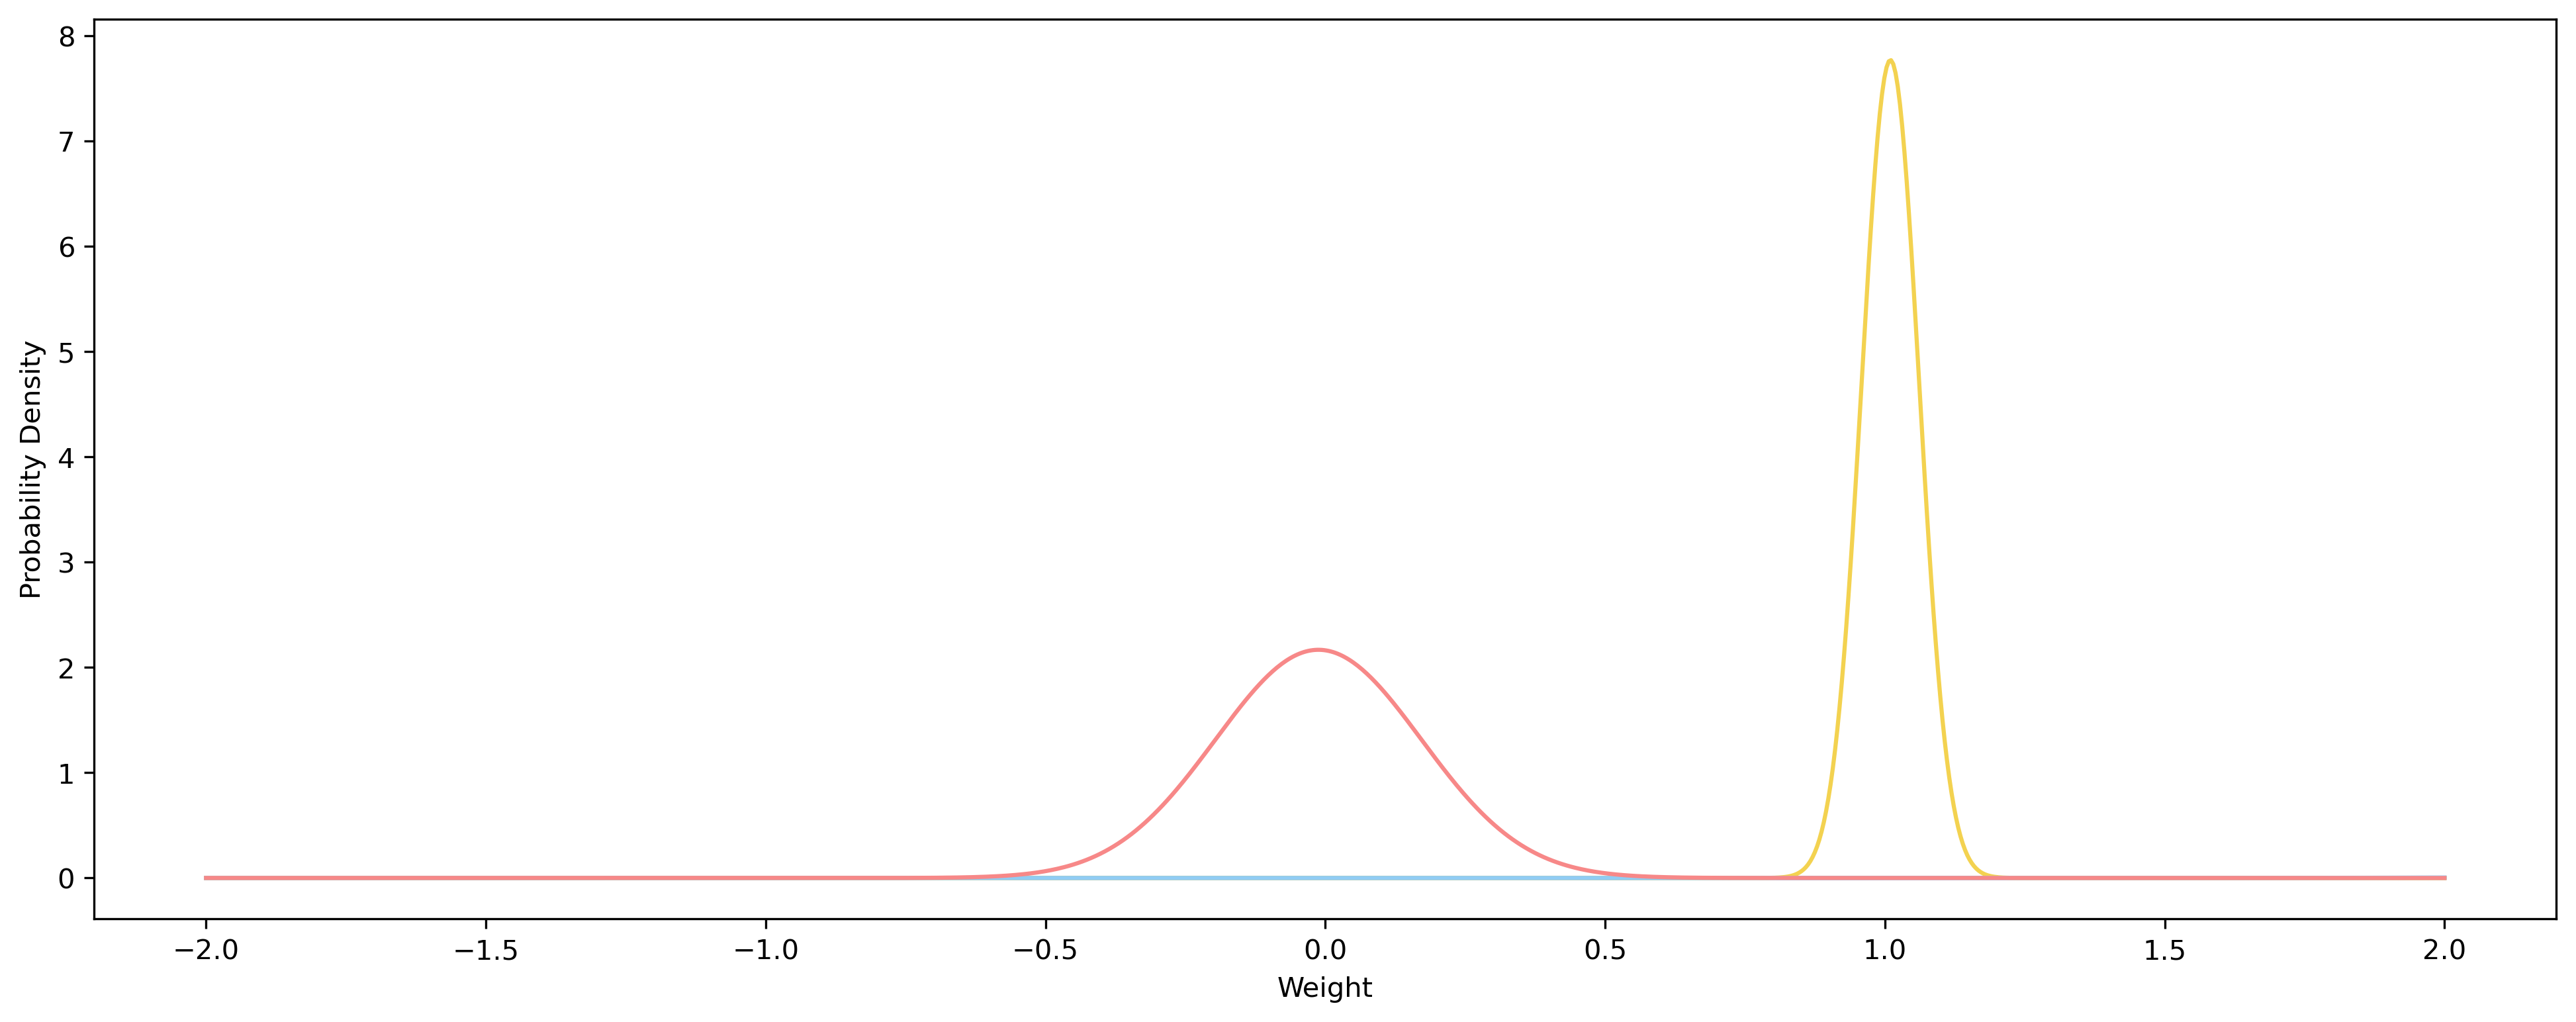

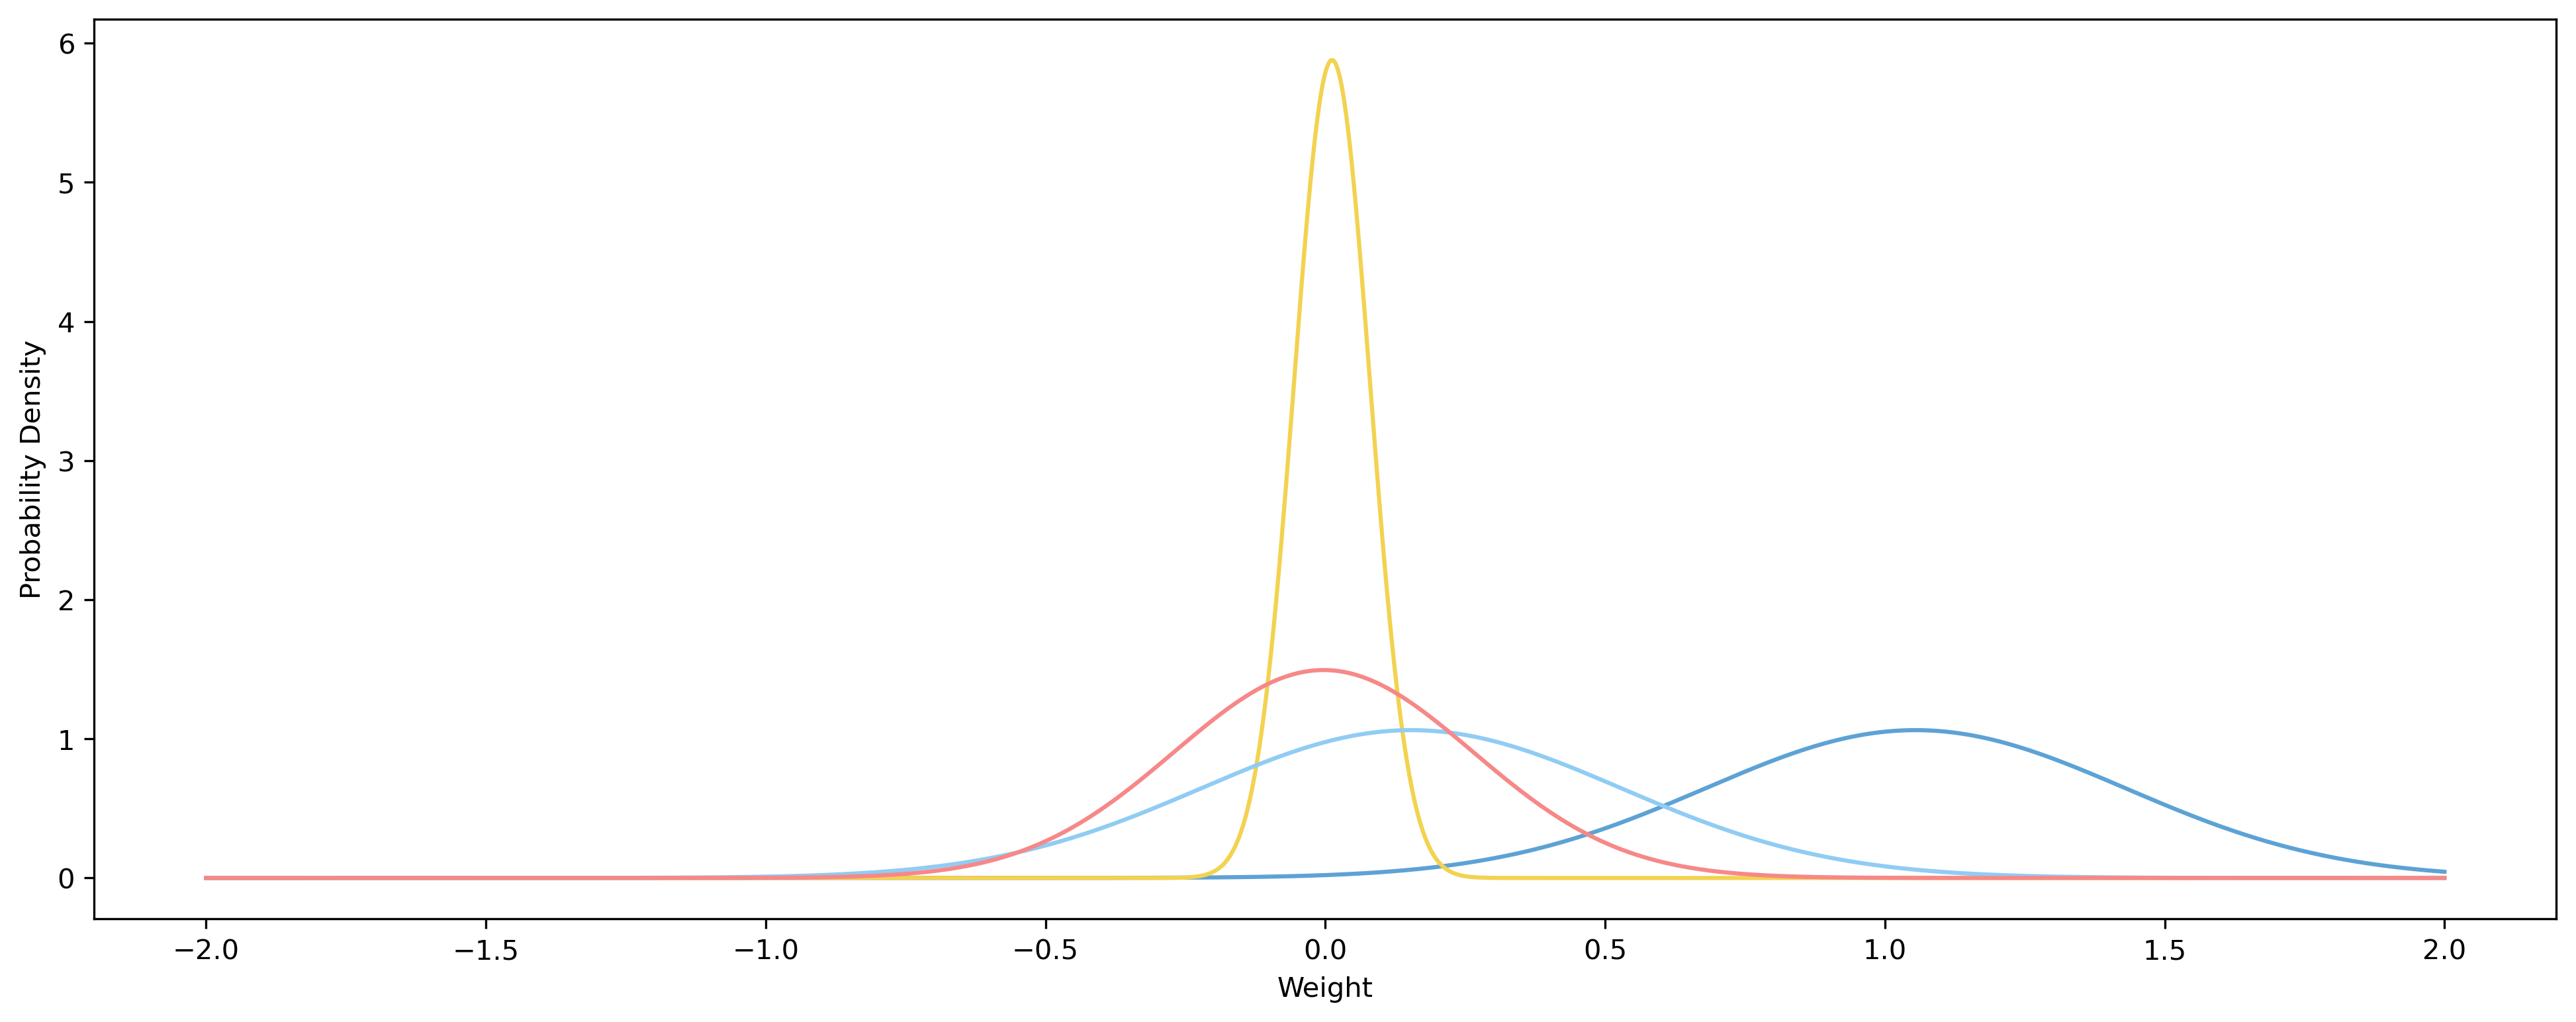

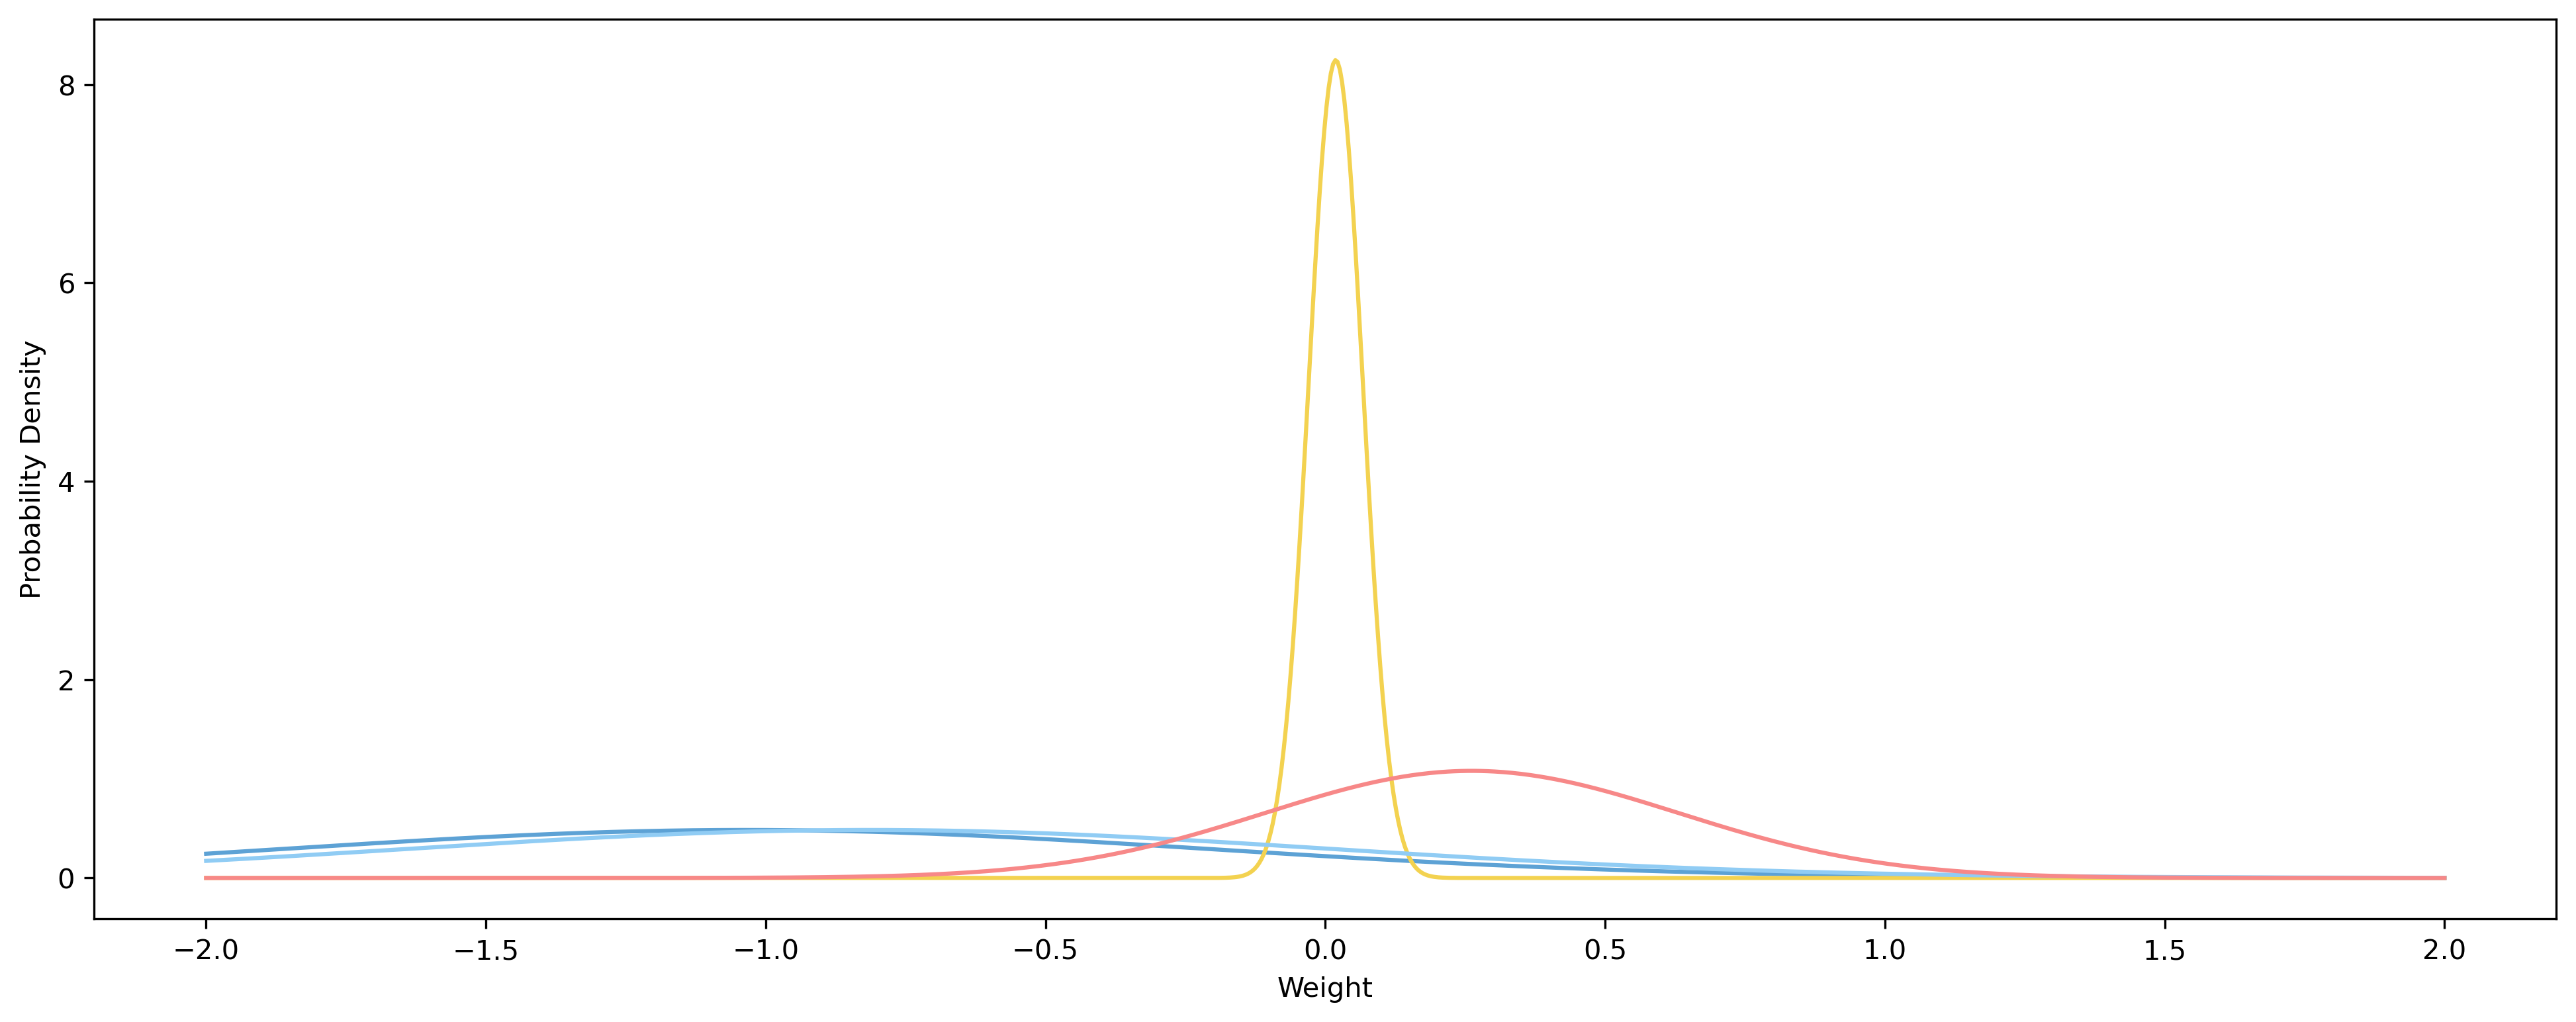

In [31]:
for group in groups_2:
    plot_pds(group)

### Dataset 3

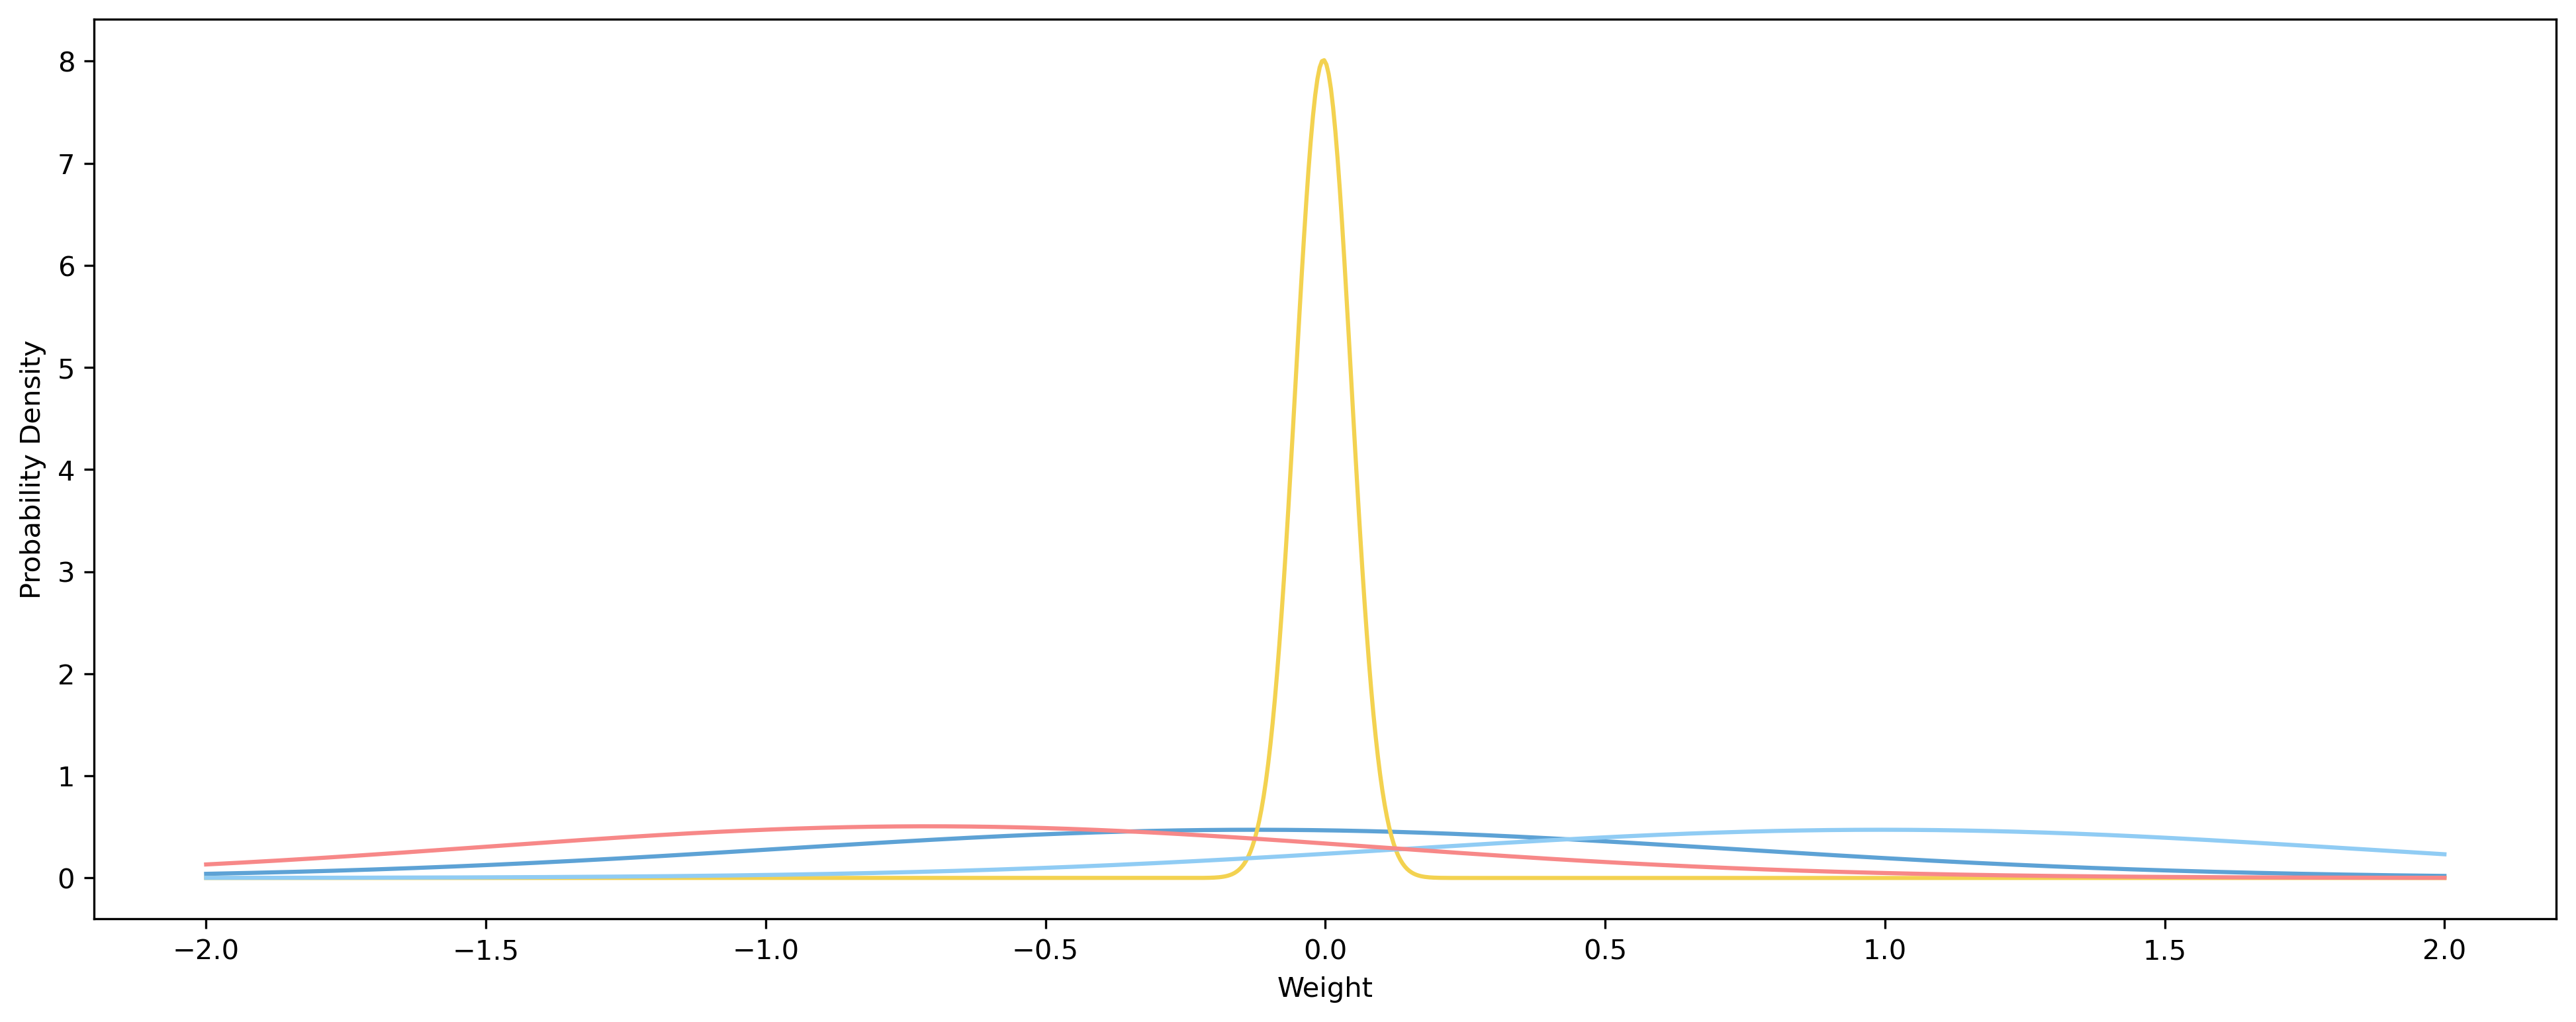

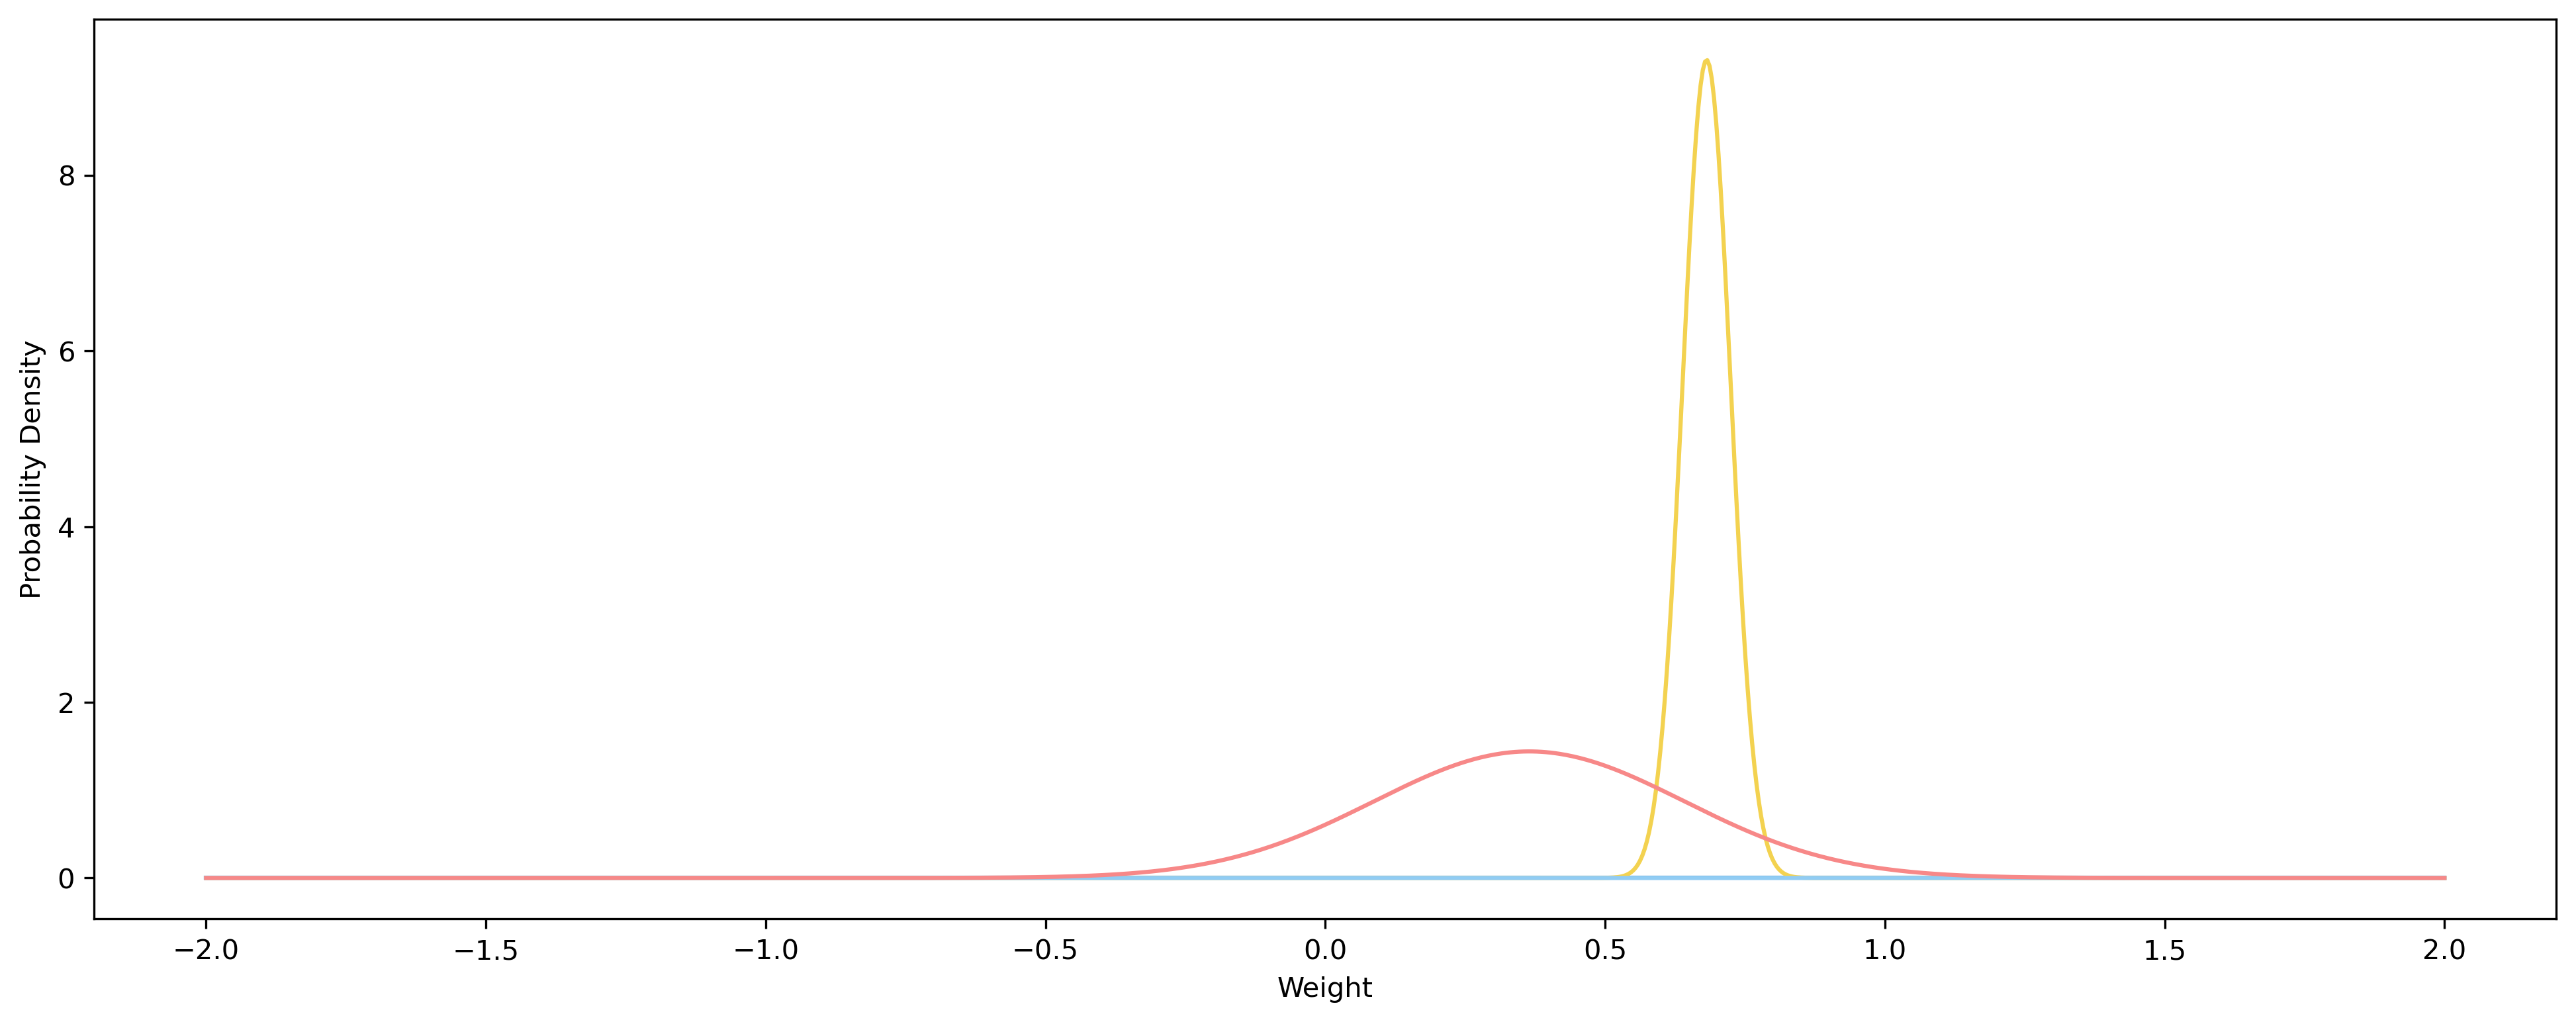

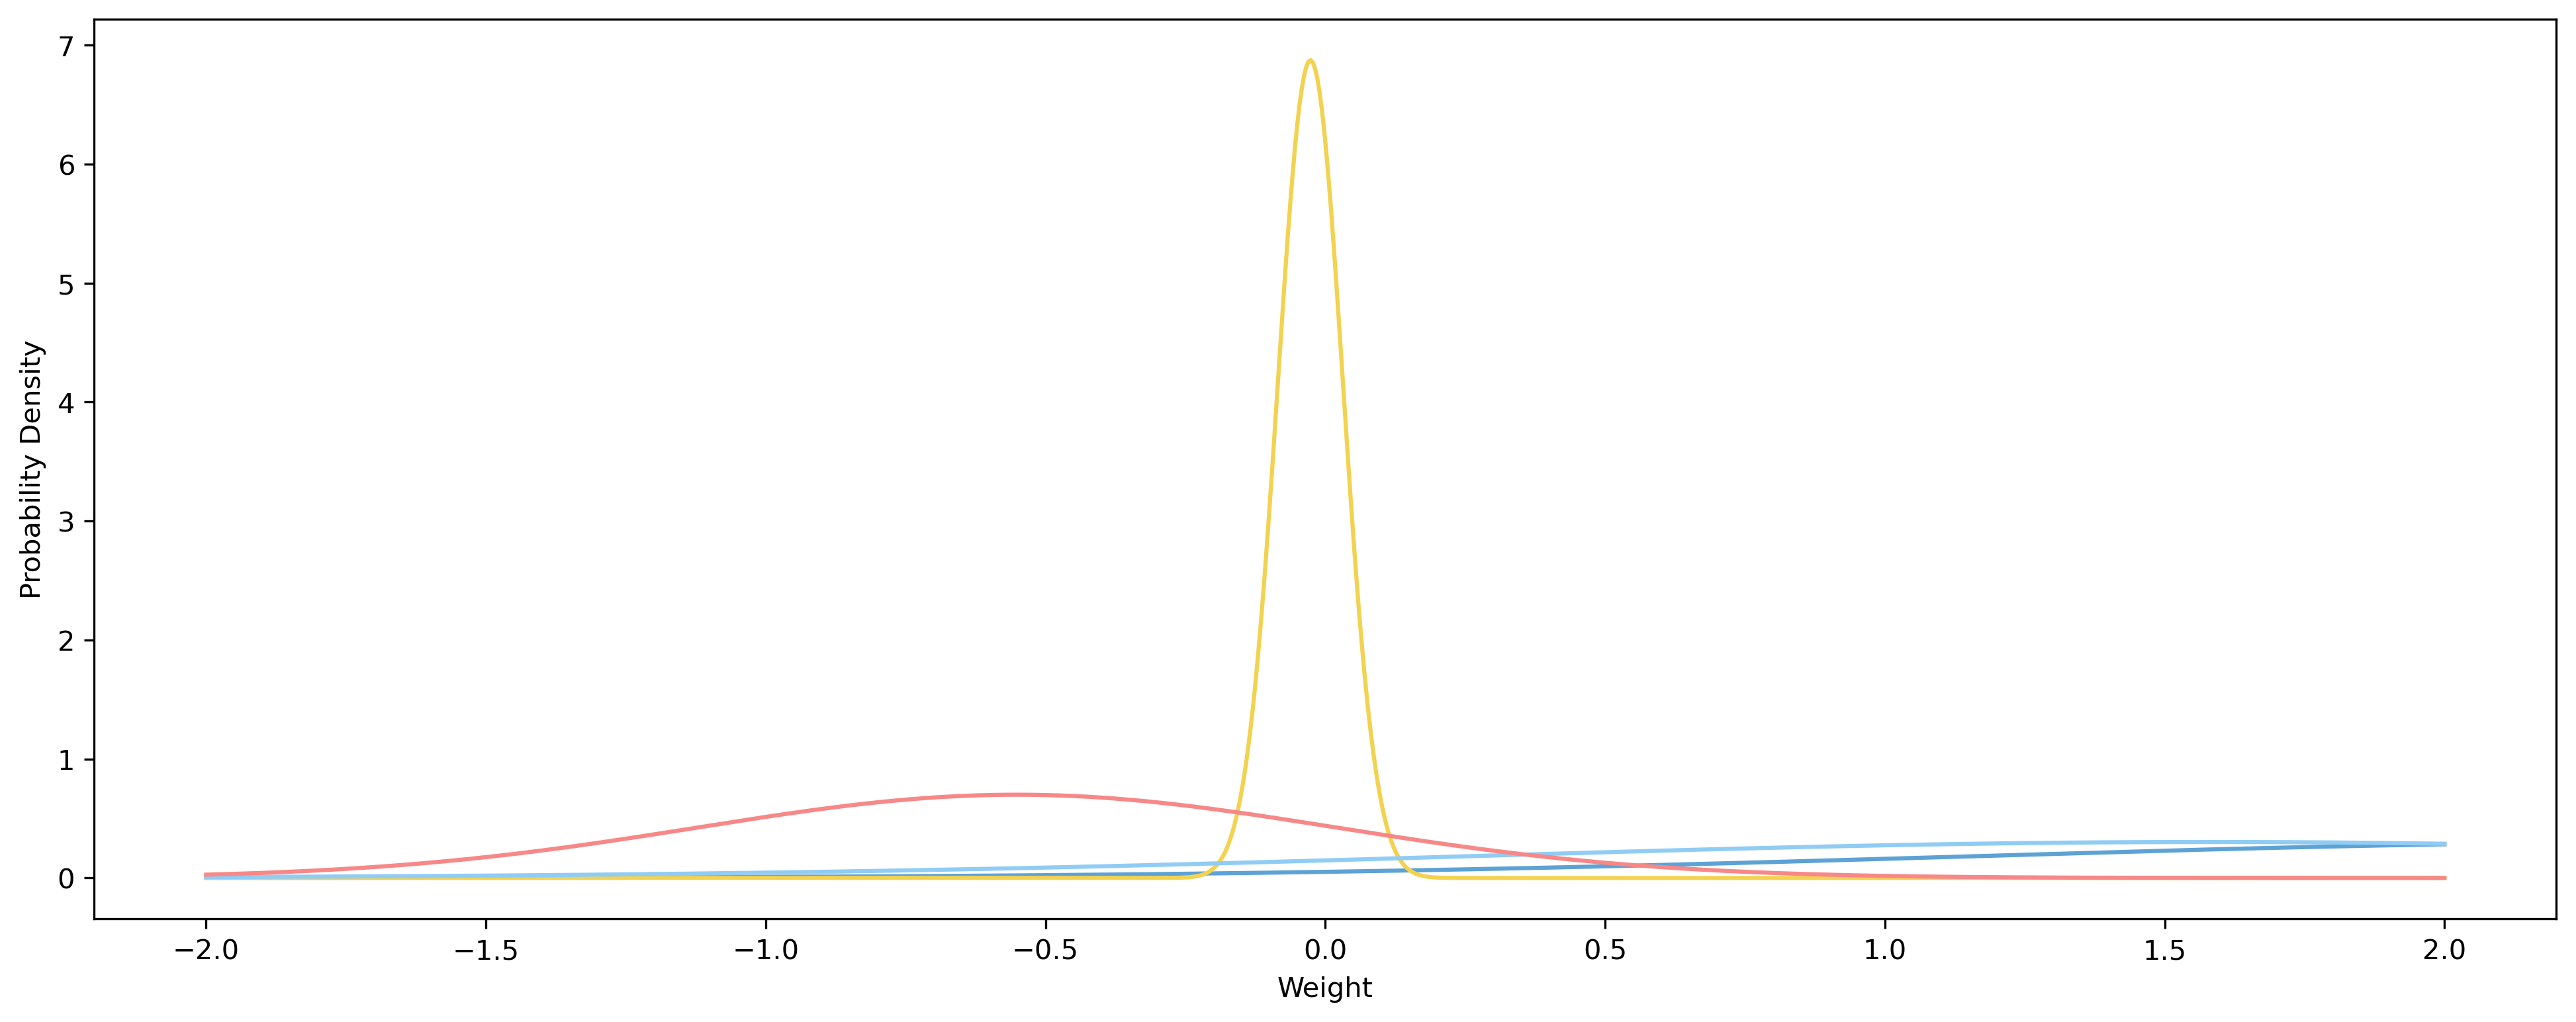

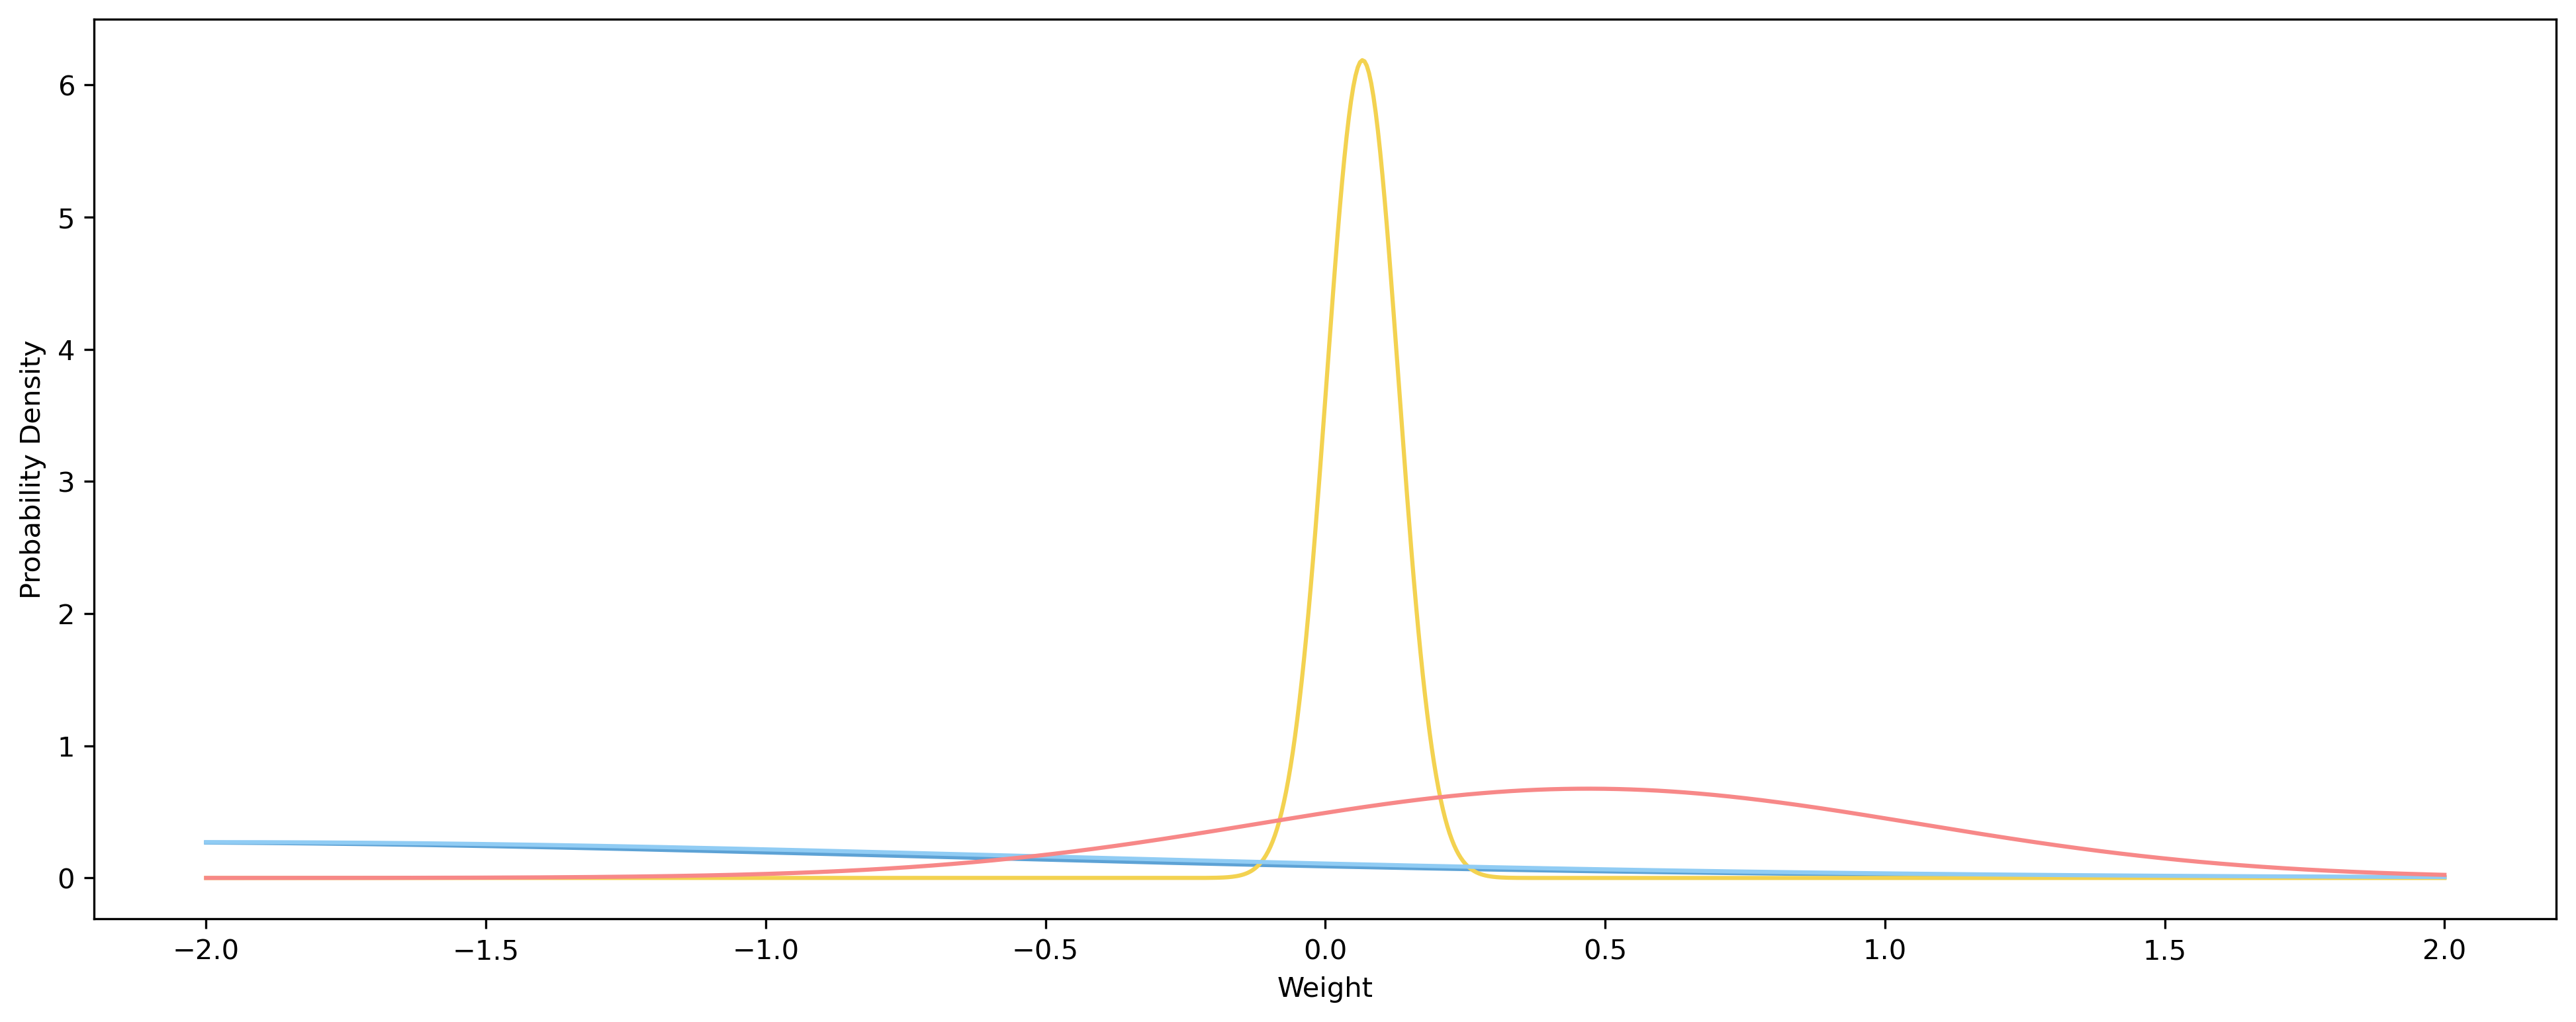

In [32]:
for group in groups_3:
    plot_pds(group)

## Evaluating Probability Densities

In [33]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[i]) for i in range(len(group))]
    stds = [stdev(group[i]) for i in range(len(group))]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            if math.floor(prob) != 0:
                values.append(prob)
        results.append(values)
    return results

In [34]:
def barrage(all_probs, nodes: int):
    res = {
        i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(nodes)
    }
    for probs in all_probs:
        for i, prob in enumerate(probs):
            try:
                res[i]["len"] += len(prob)
            except ValueError:
                pass
            try:
                res[i]["max"] += max(prob)
            except ValueError:
                pass
            try:
                res[i]["sum"] += sum(prob)
            except ValueError:
                pass
            try:
                res[i]["mean"] += mean(prob)
            except ValueError:
                pass
            try:
                res[i]["stdev"] += stdev(prob)
            except ValueError:
                pass
    return res

In [35]:
def plot_barrage(method: str):
    cdict = {"ms": light, "xs": important, "cs": darker, "noises": noise}
    data = pd.Series(df.loc[method], df.columns).sort_values(ascending=True)
    cmap = [cdict[i] for i in list(data.index.values)]
    ax = data.plot.barh(width=0.8, figsize=(3, 1), color=cmap)
    ax.set_ylabel("Input")
    ax.set_xlabel(method.capitalize())

In [36]:
all_probs_1 = [get_props(group) for group in groups_1]
all_probs_2 = [get_props(group) for group in groups_2]
all_probs_3 = [get_props(group) for group in groups_3]

### Dataset 1

In [37]:
columns = ["ms", "xs", "cs", "noises"]

res = barrage(all_probs_1, len(columns))
for i in range(len(columns)):
    res[columns[i]] = res.pop(i)
df = pd.DataFrame(res)
df

,ms,xs,cs,noises
len,181.000000,342.000000,182.000000,380.000000
max,3.872808,21.461658,3.873023,15.134495
sum,295.065659,860.532093,296.067736,715.620298
mean,3.133169,13.325929,3.122827,9.945504
stdev,0.592871,5.884634,0.599854,3.756841


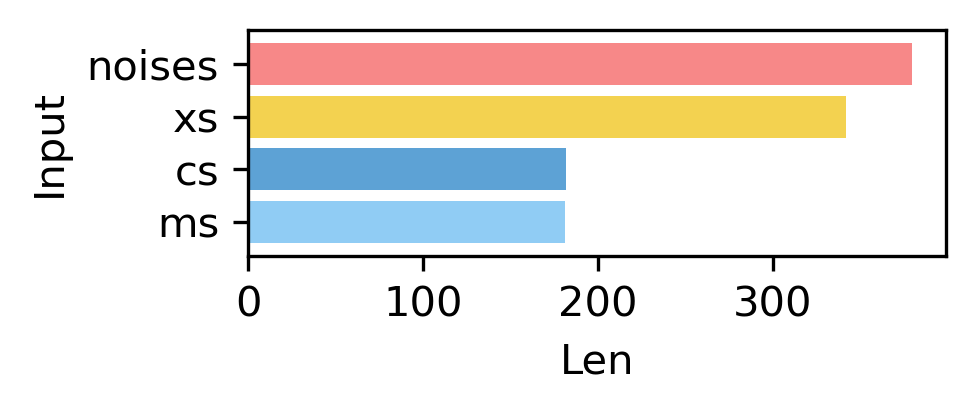

In [38]:
plot_barrage("len")

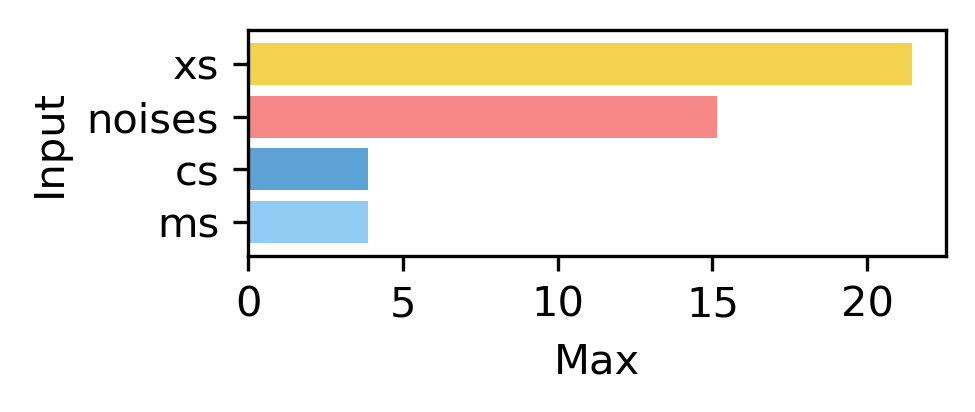

In [39]:
plot_barrage("max")

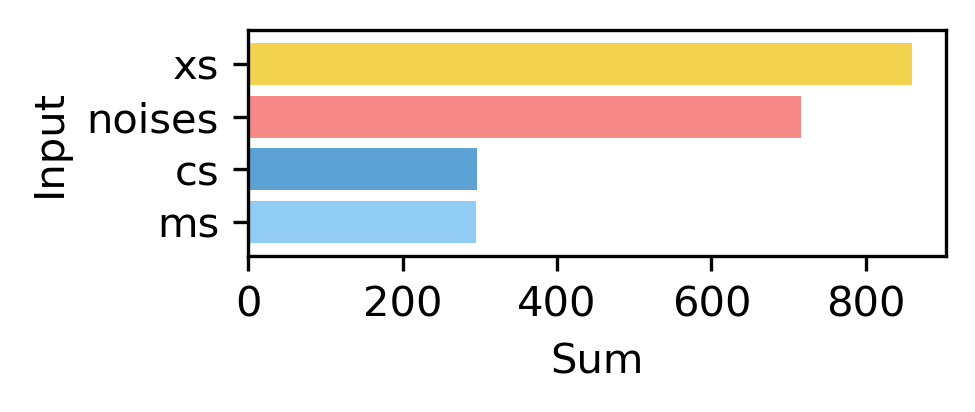

In [40]:
plot_barrage("sum")

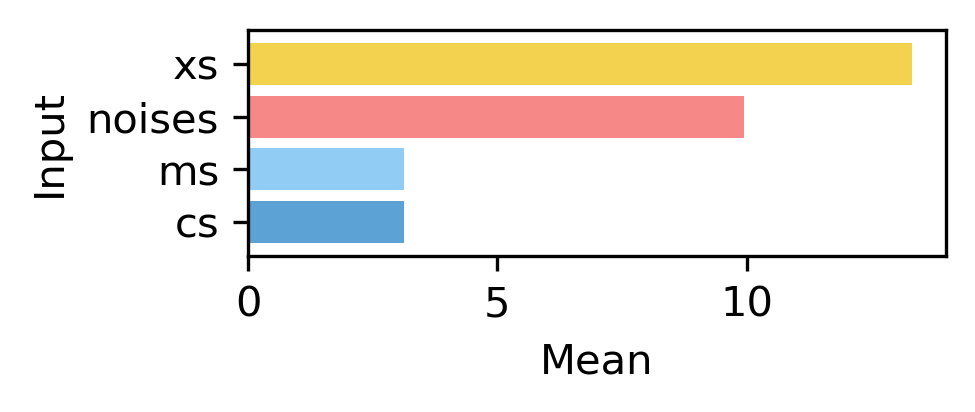

In [41]:
plot_barrage("mean")

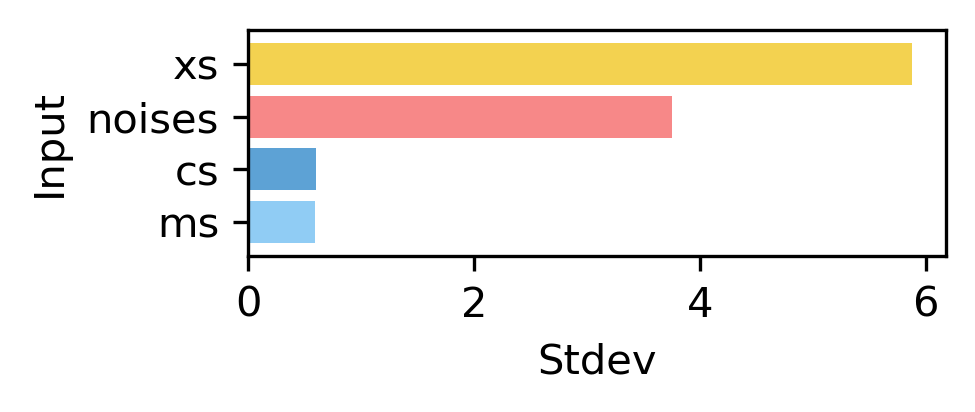

In [42]:
plot_barrage("stdev")

### Dataset 2

In [43]:
columns = ["ms", "xs", "cs", "noises"]

res = barrage(all_probs_2, len(columns))
for i in range(len(columns)):
    res[columns[i]] = res.pop(i)
df = pd.DataFrame(res)
df

,ms,xs,cs,noises
len,65.000000,220.000000,65.000000,307.000000
max,1.062569,29.166059,1.062570,4.741963
sum,67.709010,951.882345,67.709092,430.707714
mean,1.041677,17.489200,1.041678,4.087440
stdev,0.018681,8.473371,0.018683,0.544059


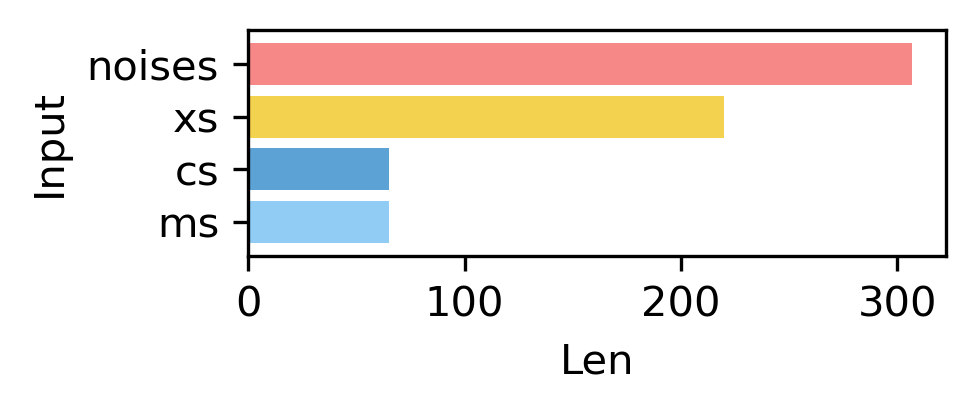

In [44]:
plot_barrage("len")

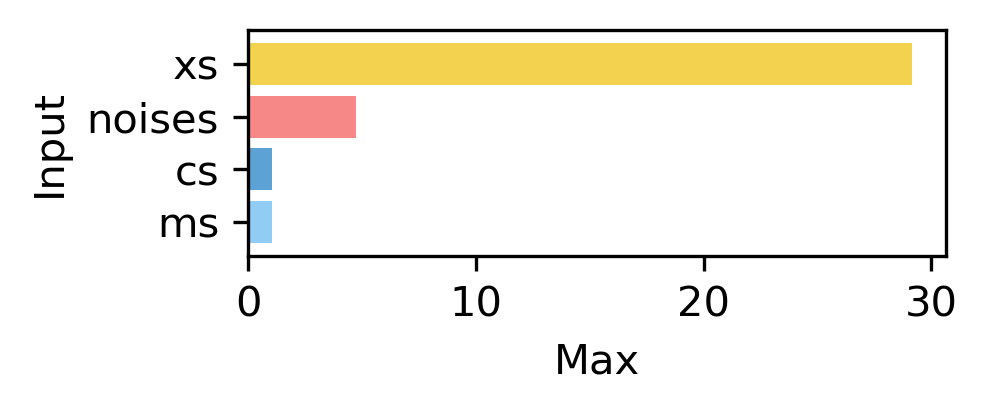

In [45]:
plot_barrage("max")

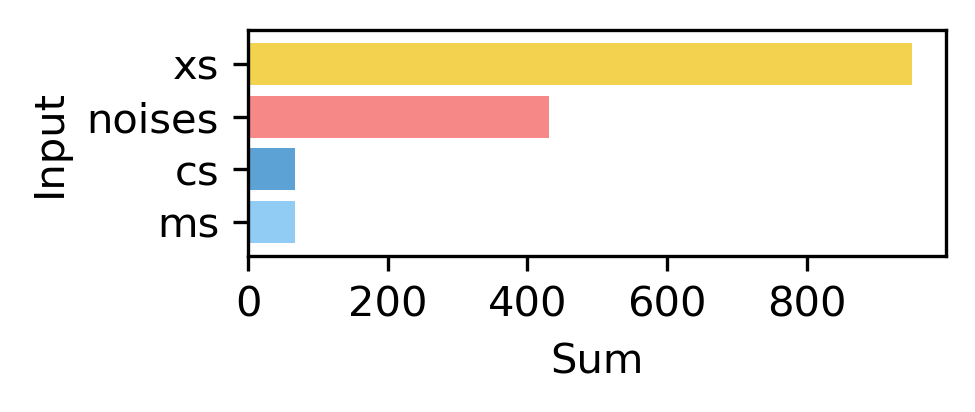

In [46]:
plot_barrage("sum")

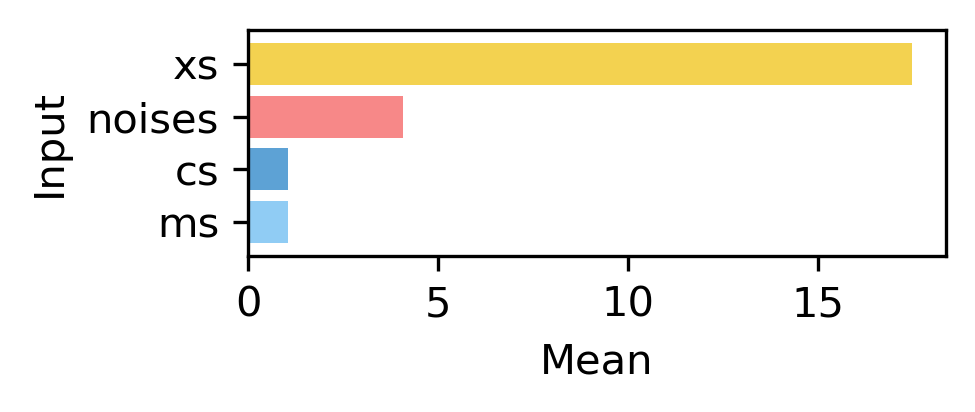

In [47]:
plot_barrage("mean")

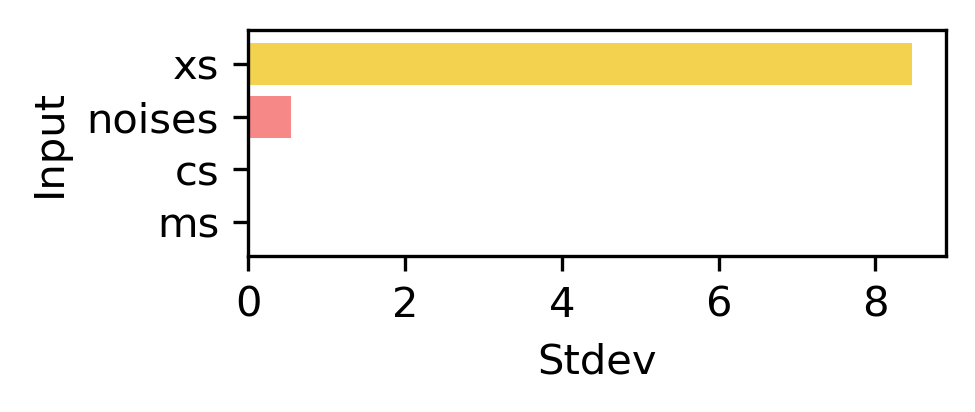

In [48]:
plot_barrage("stdev")

### Dataset 3

In [49]:
columns = ["ms", "xs", "cs", "noises"]

res = barrage(all_probs_3, len(columns))
for i in range(len(columns)):
    res[columns[i]] = res.pop(i)
df = pd.DataFrame(res)
df

,ms,xs,cs,noises
len,0,214.000000,0,118.000000
max,0,30.380154,0,1.440344
sum,0,953.251200,0,151.425022
mean,0,18.074763,0,1.283263
stdev,0,8.896426,0,0.134833


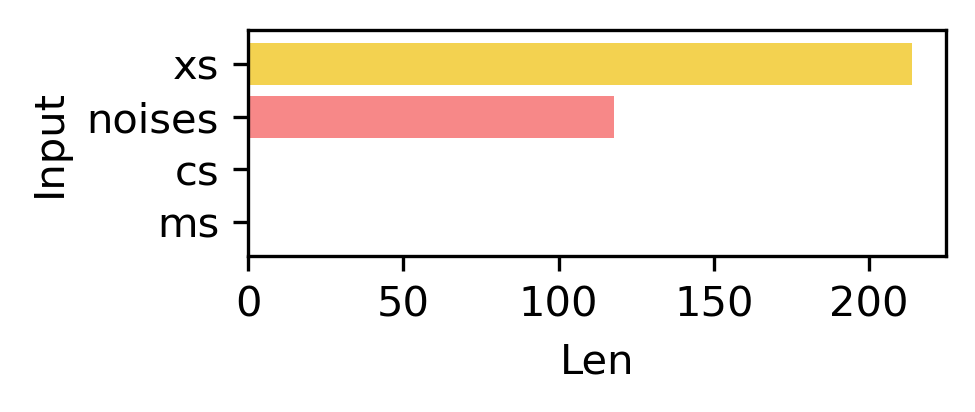

In [50]:
plot_barrage("len")

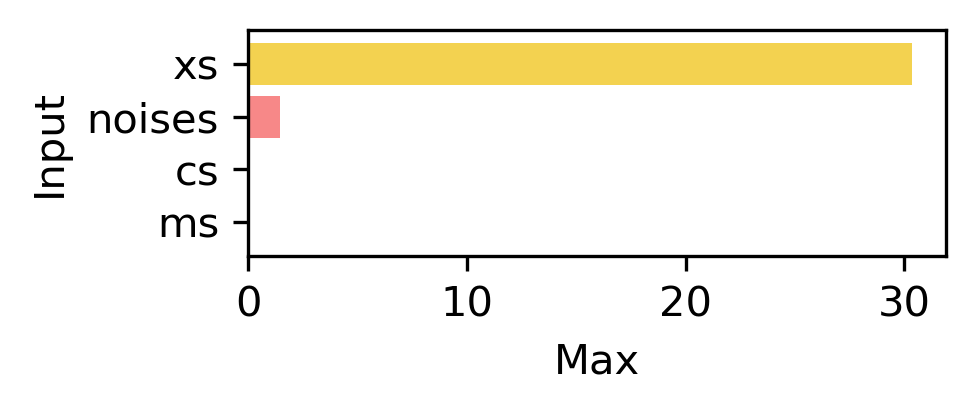

In [51]:
plot_barrage("max")

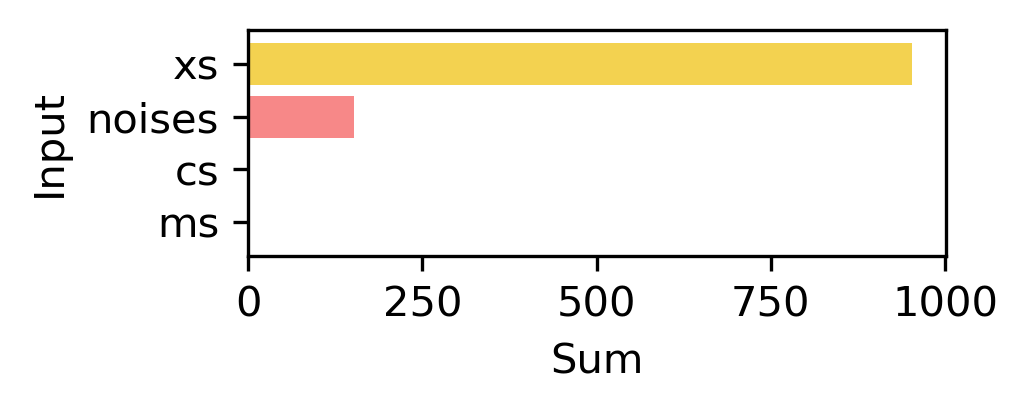

In [52]:
plot_barrage("sum")

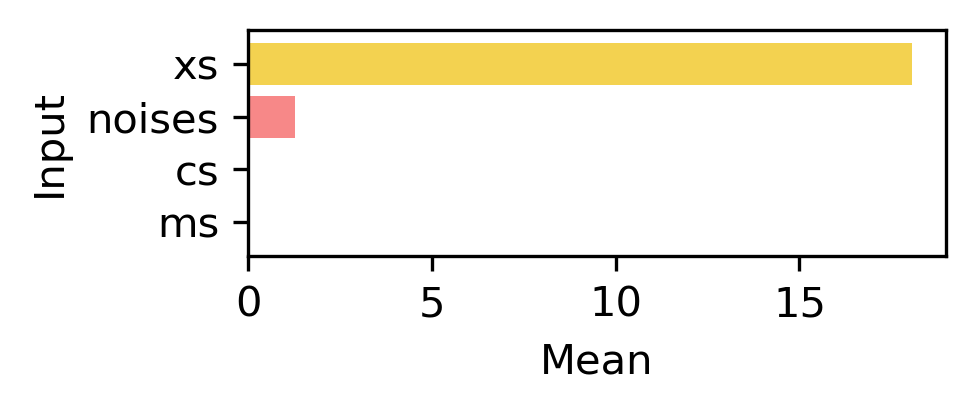

In [53]:
plot_barrage("mean")

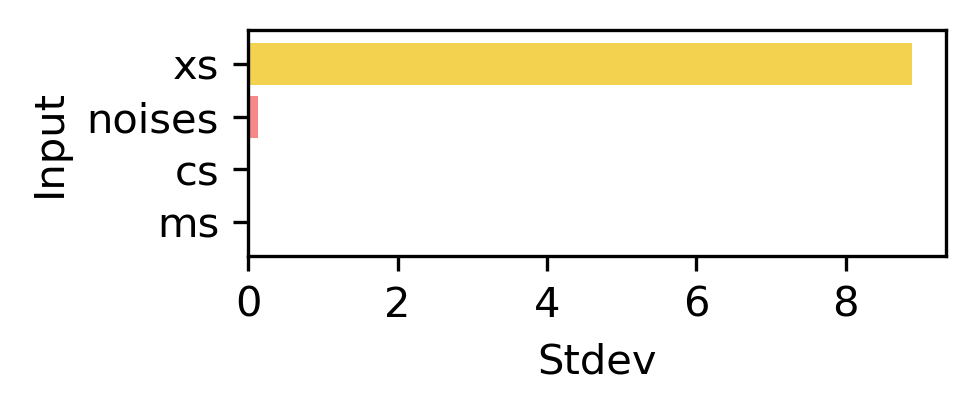

In [54]:
plot_barrage("stdev")